In [4]:
#packages
import bs4 as bs
import requests
import re

def get_ES50Tickers_from_Wikipedia():
    url = "https://en.wikipedia.org/wiki/EURO_STOXX_50"
    headers = {"User-Agent": "Mozilla/5.0"}  # avoid 403

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    soup = bs.BeautifulSoup(response.text, "lxml")
    tables = soup.find_all("table", class_="wikitable sortable")

    table = None
    ticker_col_index = None

    # Find the table with the Ticker column
    for t in tables:
        headings = [re.sub(r'\[.*?\]', '', th.text).strip() for th in t.find_all("th")]
        for i, h in enumerate(headings):
            if h == "Ticker":
                table = t
                ticker_col_index = i
                break
        if table:
            break

    if table is None:
        raise ValueError("Ticker column not found")

    # Extract tickers
    tickers = []
    for row in table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) > ticker_col_index:
            tickers.append(cols[ticker_col_index].text.strip())

    # Save to file
    with open("ES50tickers_2025_December.txt", "w") as f:
        f.write("\n".join(tickers))

    return tickers


        

In [5]:
tickers_Es50 = get_ES50Tickers_from_Wikipedia()

In [6]:
print(tickers_Es50)

['ADS.DE', 'ADYEN.AS', 'AD.AS', 'AI.PA', 'AIR.PA', 'ALV.DE', 'ABI.BR', 'ARGX.BR', 'ASML.AS', 'CS.PA', 'BAS.DE', 'BAYN.DE', 'BBVA.MC', 'SAN.MC', 'BMW.DE', 'BNP.PA', 'BN.PA', 'DB1.DE', 'DB1.DE', 'DHL.DE', 'DTE.DE', 'ENEL.MI', 'ENI.MI', 'EL.PA', 'RACE.MI', 'RMS.PA', 'IBE.MC', 'ITX.MC', 'IFX.DE', 'INGA.AS', 'ISP.MI', 'OR.PA', 'MC.PA', 'MBG.DE', 'MUV2.DE', 'NDA-FI.HE', 'PRX.AS', 'RHM.DE', 'SAF.PA', 'SGO.PA', 'SAN.PA', 'SAP.DE', 'SU.PA', 'SIE.DE', 'ENR.DE', 'TTE.PA', 'DG.PA', 'UCG.MI', 'VOW.DE', 'WKL.AS']


In [7]:
import datetime as dt
import pandas as pd
import pandas_datareader as web

import yfinance as yf
def get_YahooData(ticker_Es50):
    f_yh = yf.download(tickers_Es50, start = '2000-01-01')

    f_yh = pd.DataFrame(f_yh)

    f_yh.to_csv('ES50_yahooData_.csv')

    return f_yh

In [8]:
YahooData_d = get_YahooData(tickers_Es50)

C:\Users\delni\AppData\Local\Temp\ipykernel_49984\1505565544.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  f_yh = yf.download(tickers_Es50, start = '2000-01-01')
[*********************100%***********************]  49 of 49 completed


In [9]:
YahooData_d.dropna(axis=0, inplace = True)
print(YahooData_d)


Price           Close                                                  \
Ticker         ABI.BR      AD.AS      ADS.DE     ADYEN.AS       AI.PA   
Date                                                                    
2020-09-29  43.359097  21.391874  268.720642  1602.500000  103.754799   
2020-09-30  43.288860  21.157259  263.846985  1572.500000  102.245644   
2020-10-01  42.890858  21.148880  266.522705  1605.000000  101.906090   
2020-10-02  42.900223  21.106985  264.611420  1602.500000  101.981544   
2020-10-05  43.817978  21.190779  261.362335  1630.000000  100.736481   
...               ...        ...         ...          ...         ...   
2025-12-17  55.580002  34.669998  168.550003  1329.599976  159.339996   
2025-12-18  55.340000  34.900002  168.550003  1370.199951  159.699997   
2025-12-19  55.480000  34.799999  165.100006  1377.400024  159.500000   
2025-12-22  54.119999  34.700001  166.800003  1374.599976  160.000000   
2025-12-23  54.259998  34.520000  164.399994  1363.

In [10]:
YahooData_d.describe()

Price         Close                                                      \
Ticker       ABI.BR        AD.AS       ADS.DE     ADYEN.AS        AI.PA   
count   1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      52.463894    26.721090   206.690695  1566.765927   137.344081   
std        4.004872     4.708737    49.071763   409.706153    26.308949   
min       41.729618    18.199430    92.420357   630.799988    94.096176   
25%       49.659679    24.127113   168.000000  1350.000000   113.774078   
50%       52.573338    25.724442   204.486145  1487.599976   137.906555   
75%       55.241924    29.349646   245.488983  1746.000000   162.966690   
max       62.605350    37.369022   324.727264  2766.000000   185.899994   

Price                                                                    ...  \
Ticker       AIR.PA       ALV.DE      ARGX.BR      ASML.AS       BAS.DE  ...   
count   1309.000000  1309.000000  1309.000000  1309.000000  1309.000000  ...   
mean     124.769312   220.586912   393.611383   622.308026    43.325013  ...   
std       32.790467    70.127992   135.812615   146.393519     4.799232  ...   
min       57.464821   117.956451   208.800003   294.205109    31.983152  ...   
25%      101.156776   166.970993   276.700012   536.100891    39.999298  ...   
50%      119.198334   191.056427   360.100006   612.019775    42.701832  ...   
75%      144.687622   269.283813   478.200012   687.161560    46.700516  ...   
max      214.149994   391.000000   803.000000   988.398499    54.323990  ...   

Price         Volume                                                          \
Ticker        SAN.MC        SAN.PA        SAP.DE        SGO.PA        SIE.DE   
count   1.309000e+03  1.309000e+03  1.309000e+03  1.309000e+03  1.309000e+03   
mean    4.424902e+07  1.856172e+06  1.925902e+06  1.160584e+06  1.373298e+06   
std     3.214470e+07  8.772188e+05  1.347236e+06  6.110386e+05  7.764594e+05   
min     1.939777e+06  5.003050e+05  0.000000e+00  2.629650e+05  0.000000e+00   
25%     2.399849e+07  1.315219e+06  1.259402e+06  8.247700e+05  9.356810e+05   
50%     3.617295e+07  1.667402e+06  1.610192e+06  1.037715e+06  1.224827e+06   
75%     5.353224e+07  2.128296e+06  2.238636e+06  1.334621e+06  1.594768e+06   
max     3.672115e+08  1.109420e+07  2.220034e+07  1.291996e+07  8.044888e+06   

Price                                                                         
Ticker         SU.PA        TTE.PA        UCG.MI        VOW.DE        WKL.AS  
count   1.309000e+03  1.309000e+03  1.309000e+03  1.309000e+03  1.309000e+03  
mean    8.955748e+05  5.346056e+06  1.466466e+07  6.292595e+04  5.389984e+05  
std     3.717294e+05  2.763696e+06  9.924938e+06  9.704346e+04  2.825491e+05  
min     2.555720e+05  0.000000e+00  2.756903e+06  0.000000e+00  1.316340e+05  
25%     6.582540e+05  3.550252e+06  7.770685e+06  3.557700e+04  3.882090e+05  
50%     8.072010e+05  4.702013e+06  1.232554e+07  4.974600e+04  4.819370e+05  
75%     1.038329e+06  6.334970e+06  1.874937e+07  7.070700e+04  6.244710e+05  
max     3.308552e+06  2.502013e+07  9.731097e+07  2.824376e+06  6.288220e+06  

[8 rows x 245 columns]

In [11]:
def Get_AdjPrice_cleaned(YahooData_d):
    P_ES50_d = YahooData_d['Close']

    P_ES50_d_s = P_ES50_d.dropna(axis=1, thresh=(P_ES50_d.shape[0] - 100))

    p_ES50_d_s = P_ES50_d_s.interpolate(method='linear', limit_direction='forward')

    return P_ES50_d_s
    

In [12]:
P_ES50_d_cleaned = Get_AdjPrice_cleaned(YahooData_d)

In [13]:
print(P_ES50_d_cleaned)

Ticker         ABI.BR      AD.AS      ADS.DE     ADYEN.AS       AI.PA  \
Date                                                                    
2020-09-29  43.359097  21.391874  268.720642  1602.500000  103.754799   
2020-09-30  43.288860  21.157259  263.846985  1572.500000  102.245644   
2020-10-01  42.890858  21.148880  266.522705  1605.000000  101.906090   
2020-10-02  42.900223  21.106985  264.611420  1602.500000  101.981544   
2020-10-05  43.817978  21.190779  261.362335  1630.000000  100.736481   
...               ...        ...         ...          ...         ...   
2025-12-17  55.580002  34.669998  168.550003  1329.599976  159.339996   
2025-12-18  55.340000  34.900002  168.550003  1370.199951  159.699997   
2025-12-19  55.480000  34.799999  165.100006  1377.400024  159.500000   
2025-12-22  54.119999  34.700001  166.800003  1374.599976  160.000000   
2025-12-23  54.259998  34.520000  164.399994  1363.199951  159.839996   

Ticker          AIR.PA      ALV.DE     ARGX.BR    

In [14]:
P_ES50_d_cleaned.to_csv('P_ES50_d_cleaned.csv')

In [15]:
import matplotlib.pyplot as plt


In [16]:
p_d = pd.read_csv('P_ES50_d_cleaned.csv')

In [17]:
p_d.head(2)

Date     ABI.BR      AD.AS      ADS.DE  ADYEN.AS       AI.PA  \
0  2020-09-29  43.359097  21.391874  268.720642    1602.5  103.754799   
1  2020-09-30  43.288860  21.157259  263.846985    1572.5  102.245644   

      AIR.PA      ALV.DE     ARGX.BR     ASML.AS  ...    SAN.MC     SAN.PA  \
0  58.483303  129.261337  222.399994  302.963196  ...  1.277692  70.723061   
1  57.997421  128.273529  225.000000  299.583771  ...  1.283631  70.025520   

       SAP.DE     SGO.PA     SIE.DE      SU.PA     TTE.PA    UCG.MI  \
0  123.574768  31.300570  94.999748  99.019623  20.913568  5.457663   
1  122.285217  31.387732  94.335167  96.428192  21.555813  5.474760   

       VOW.DE     WKL.AS  
0  101.213539  67.404488  
1  100.472794  66.999779  

[2 rows x 50 columns]

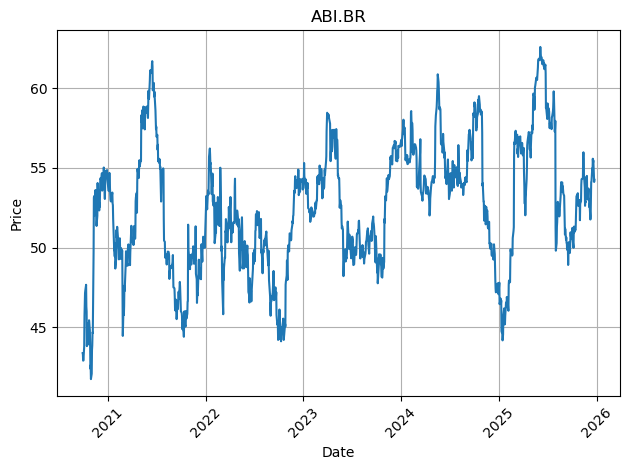

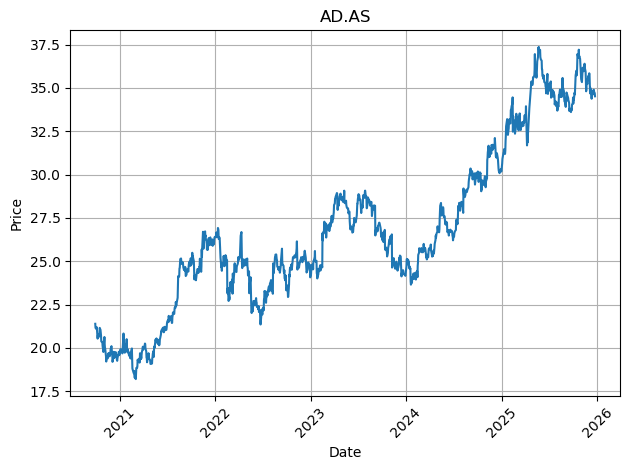

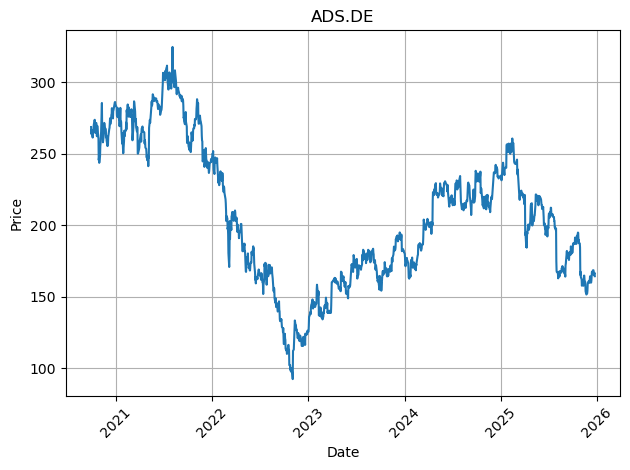

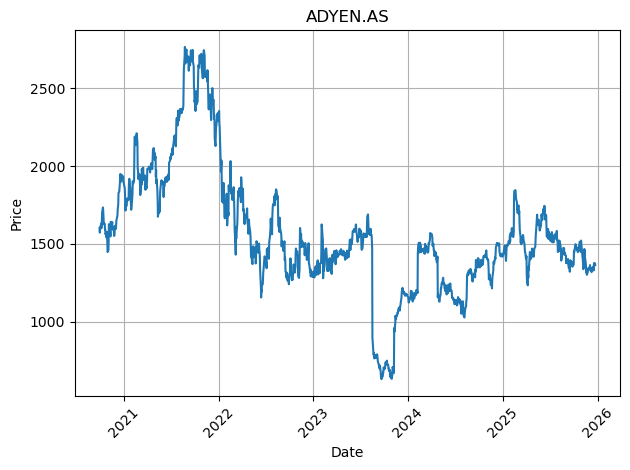

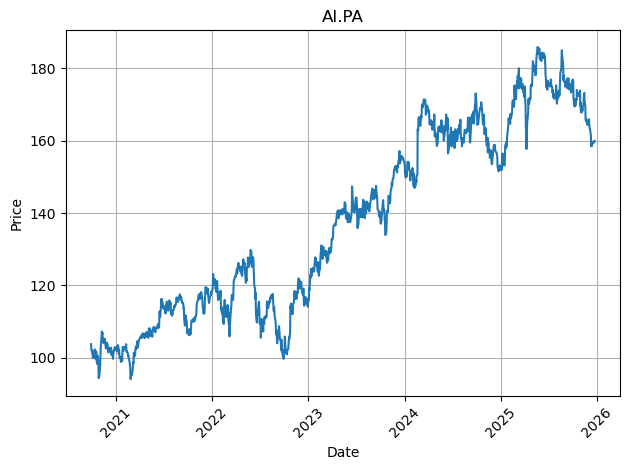

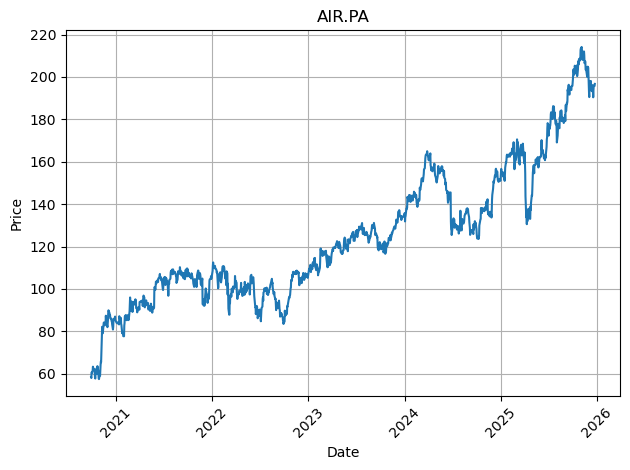

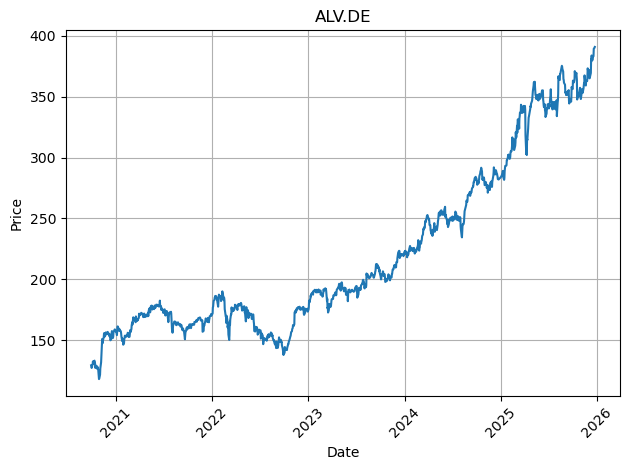

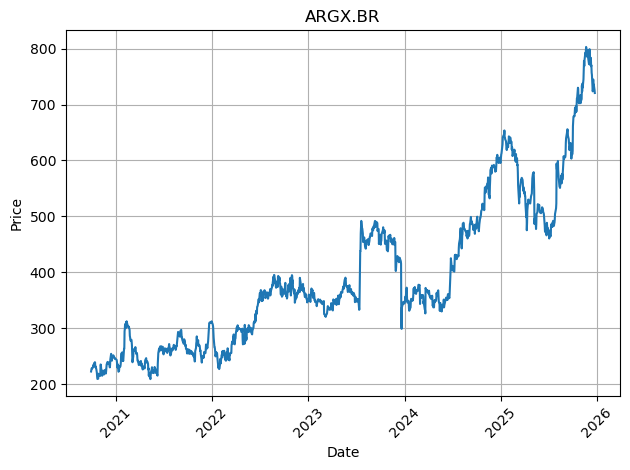

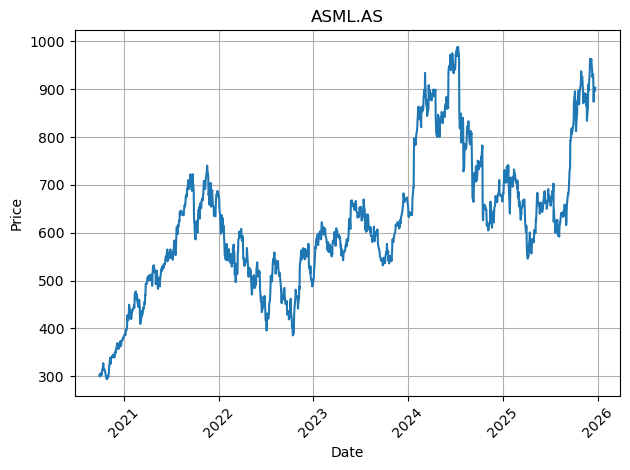

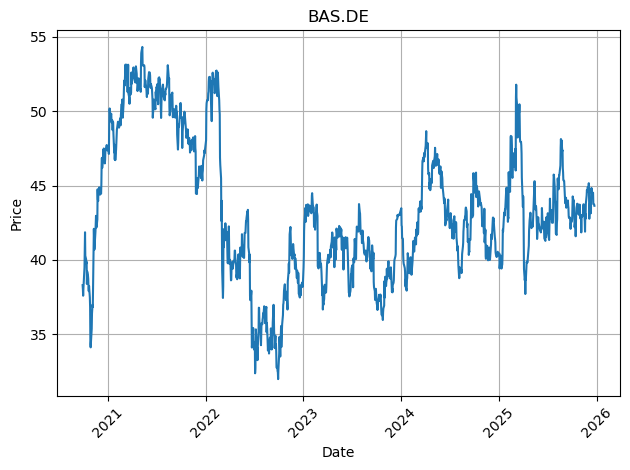

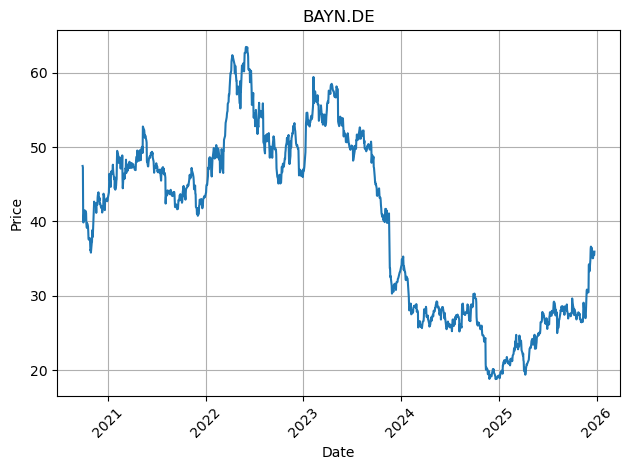

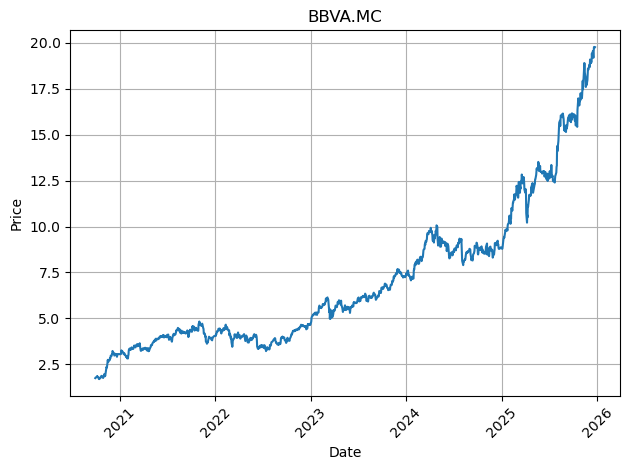

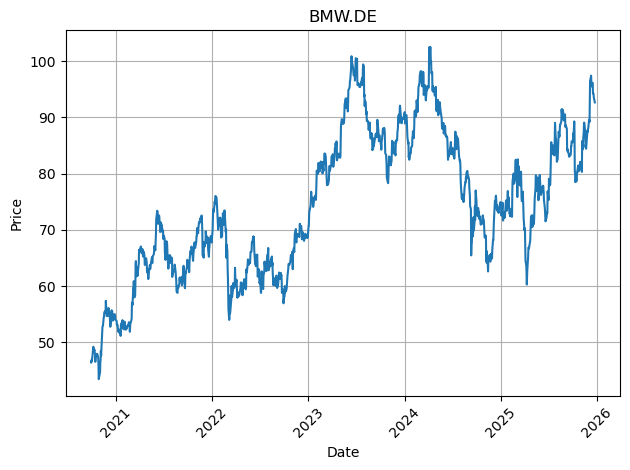

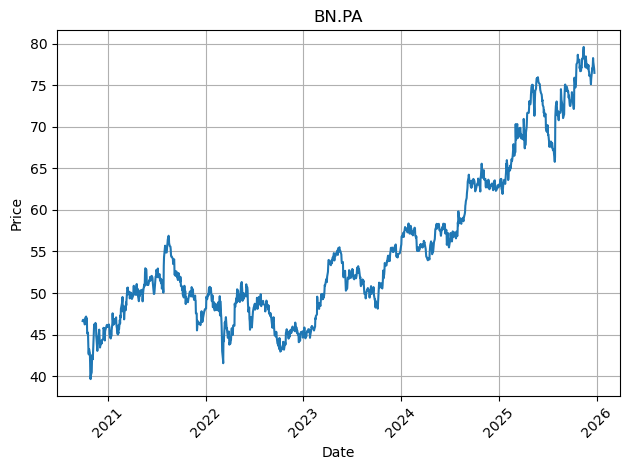

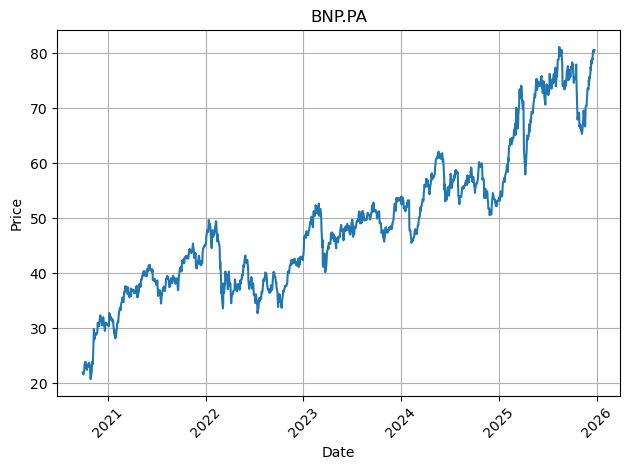

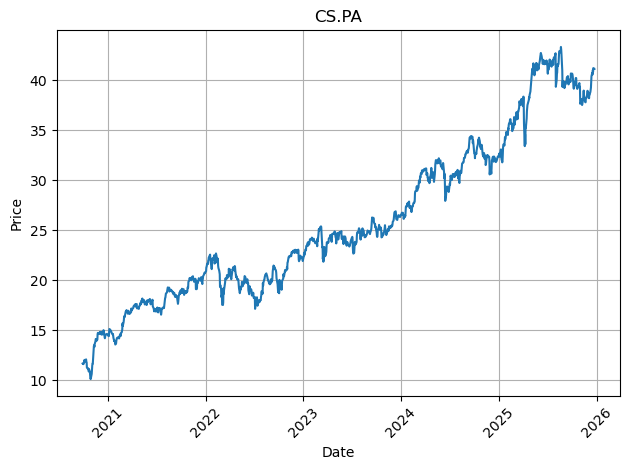

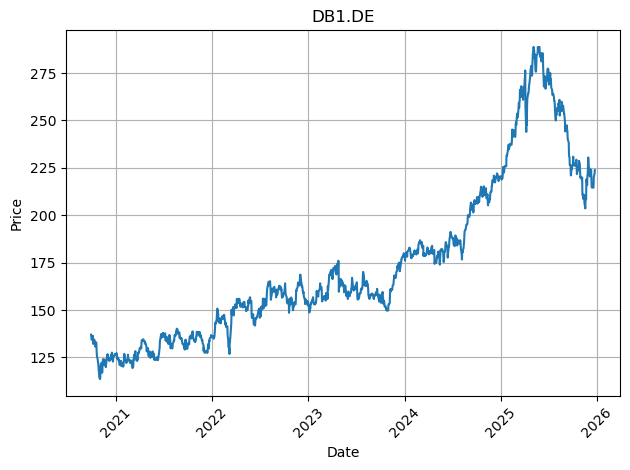

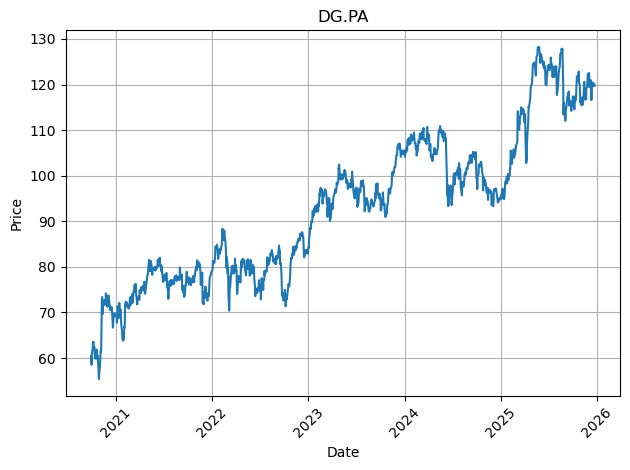

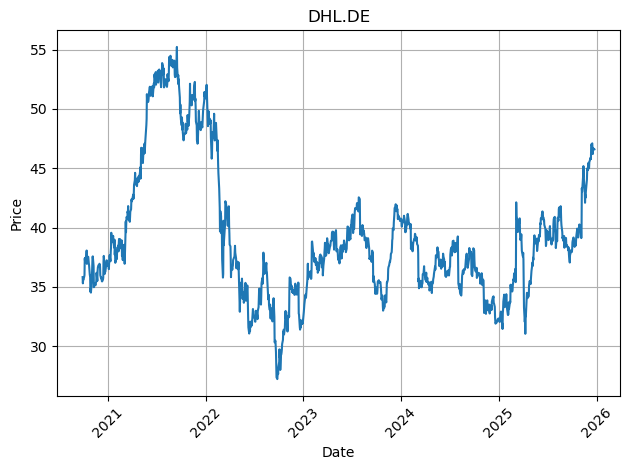

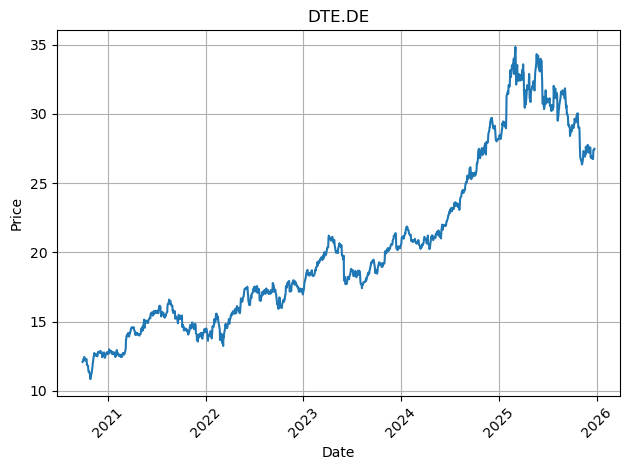

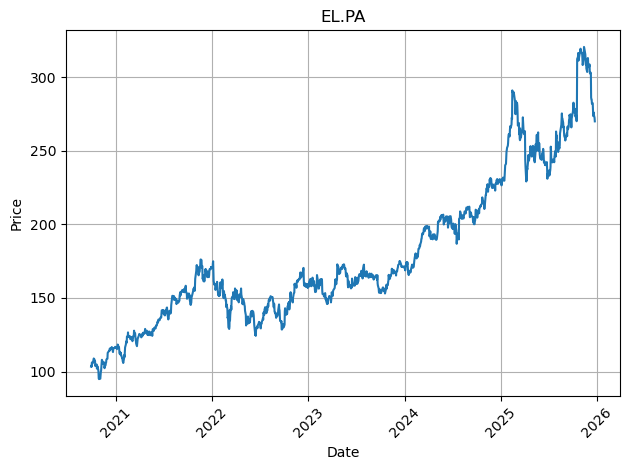

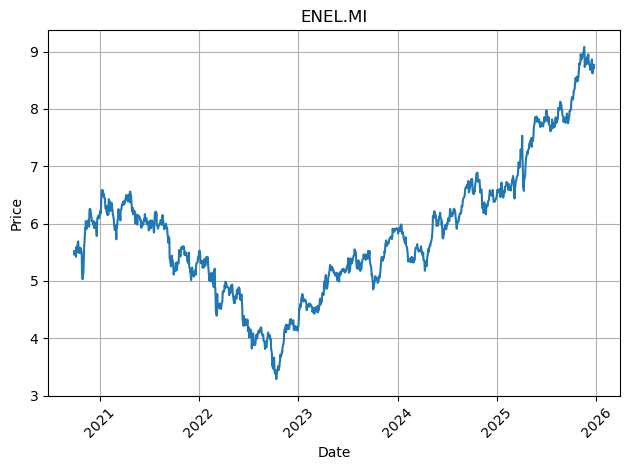

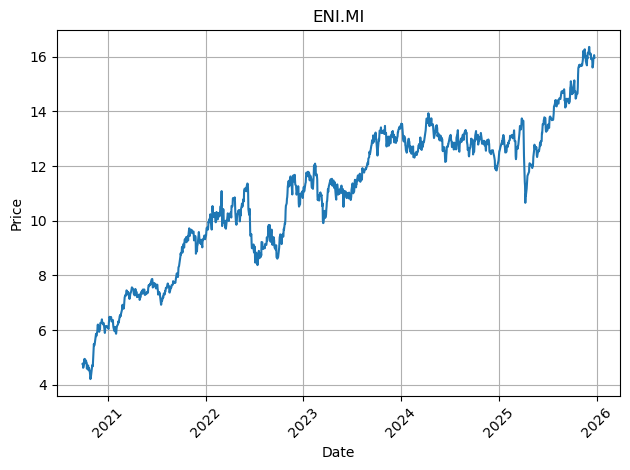

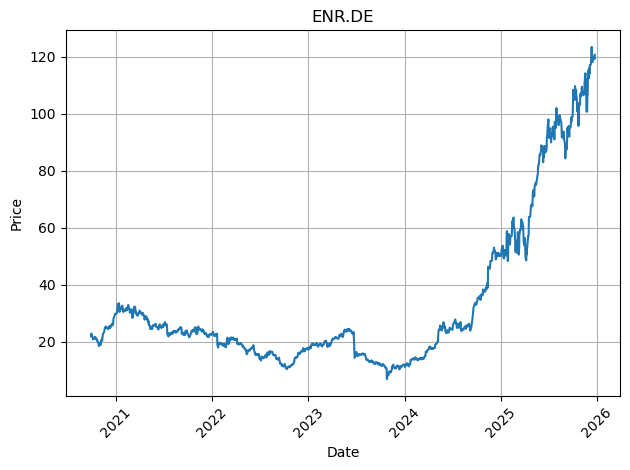

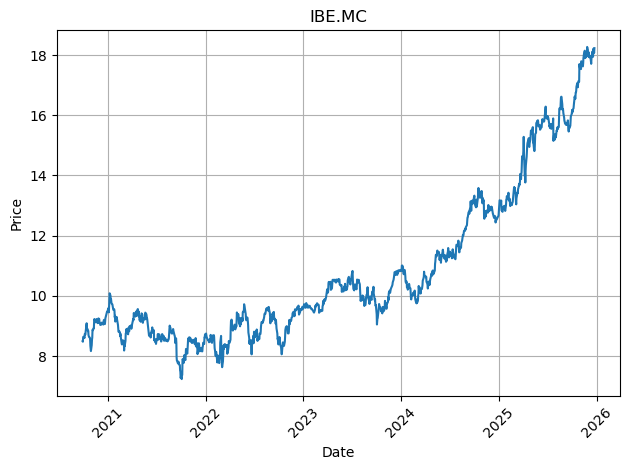

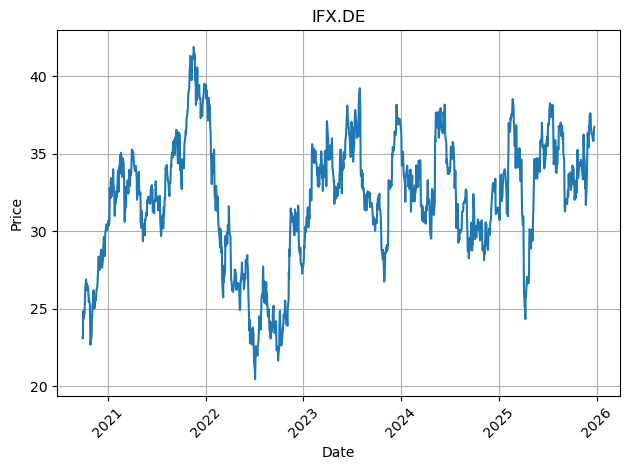

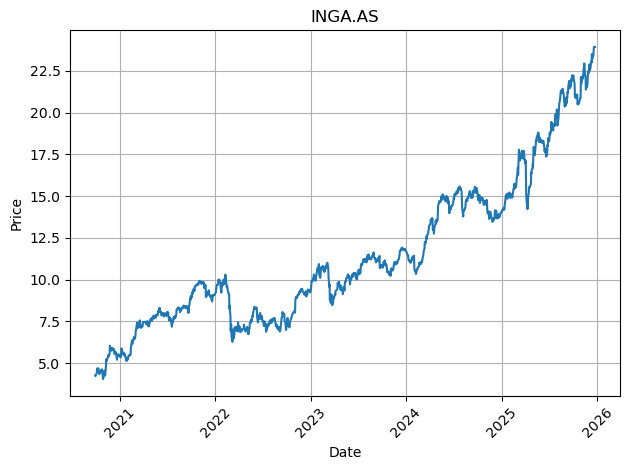

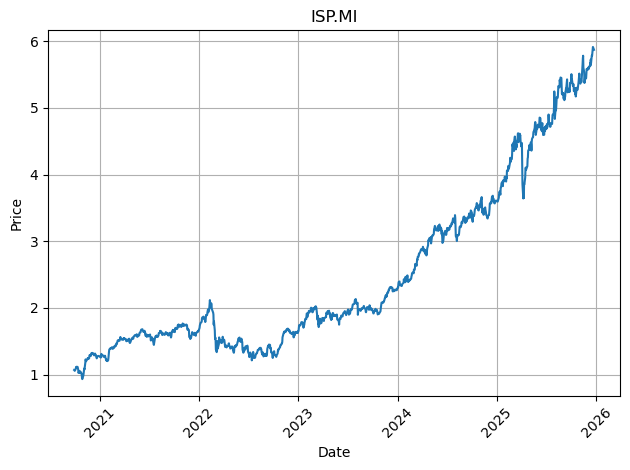

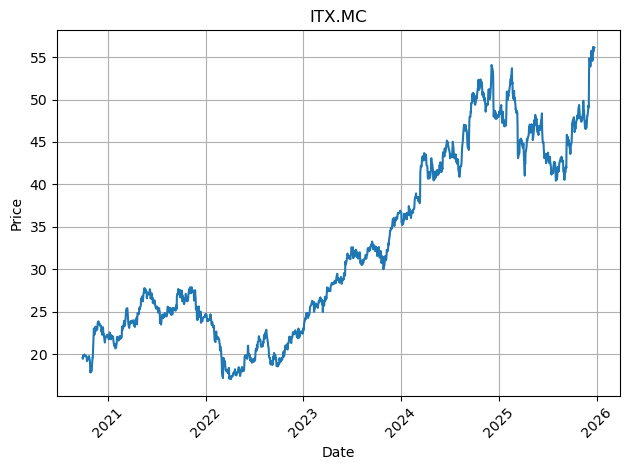

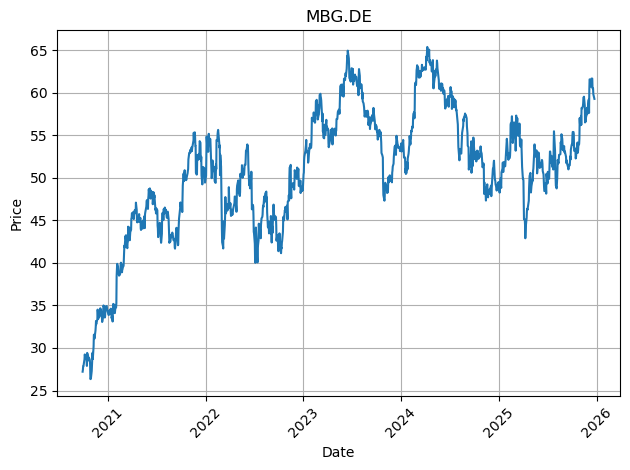

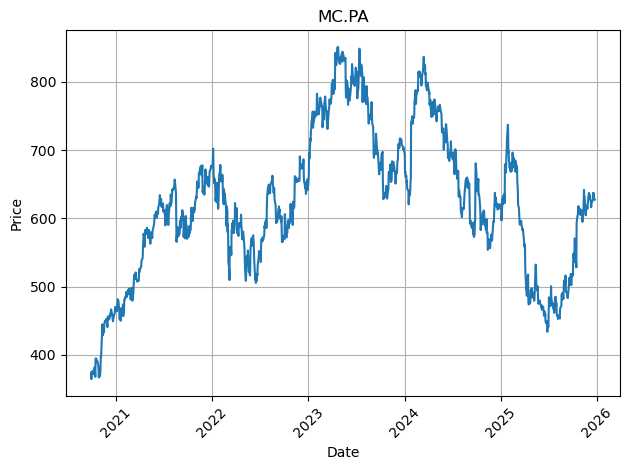

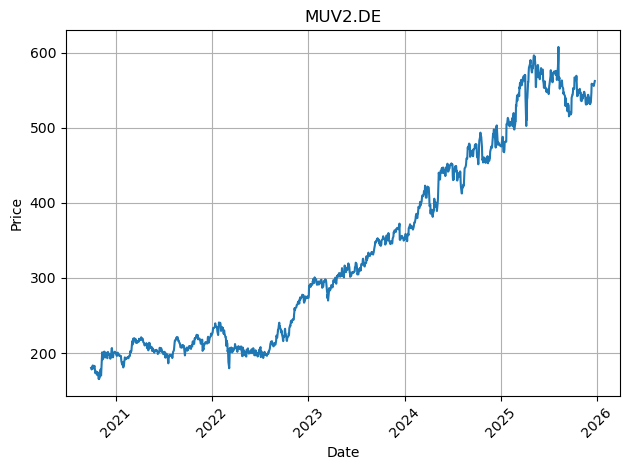

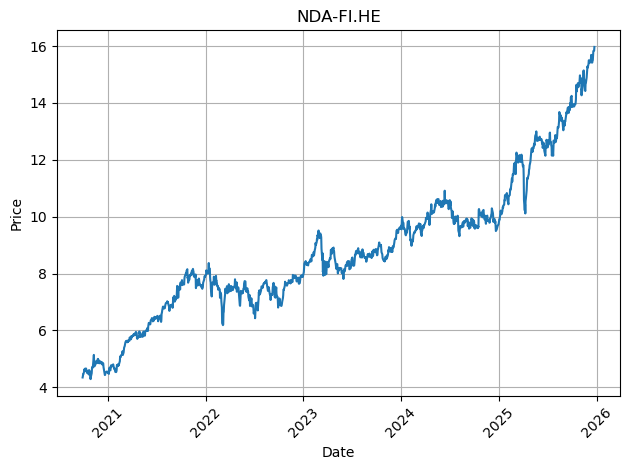

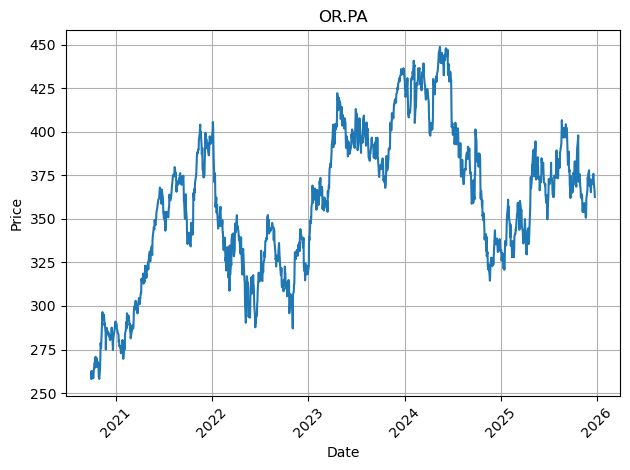

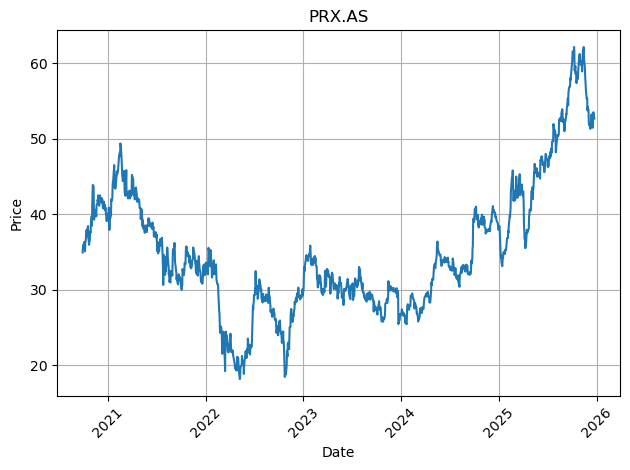

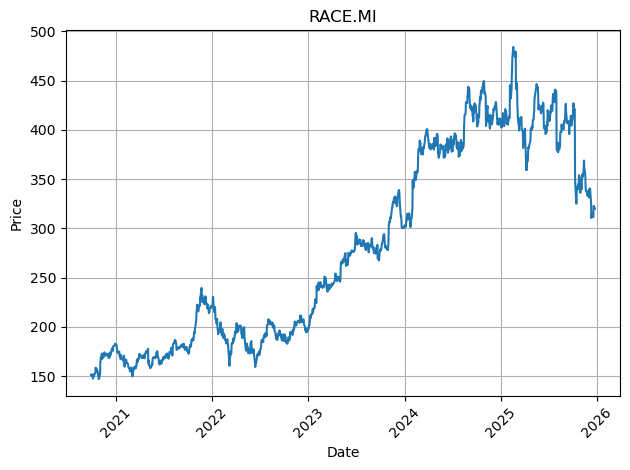

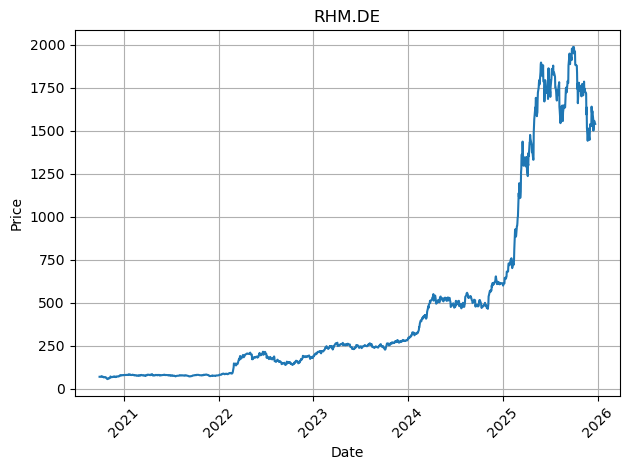

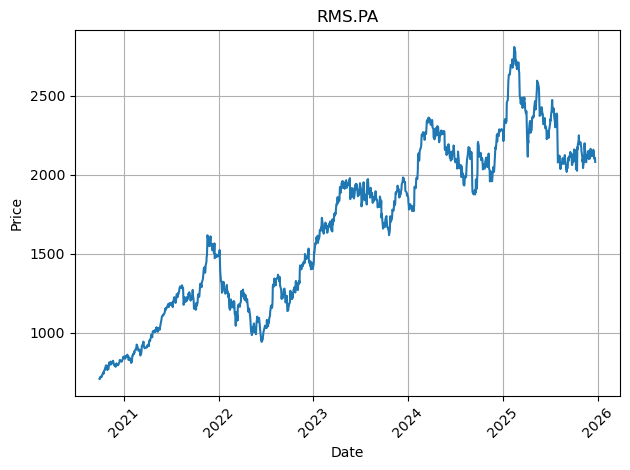

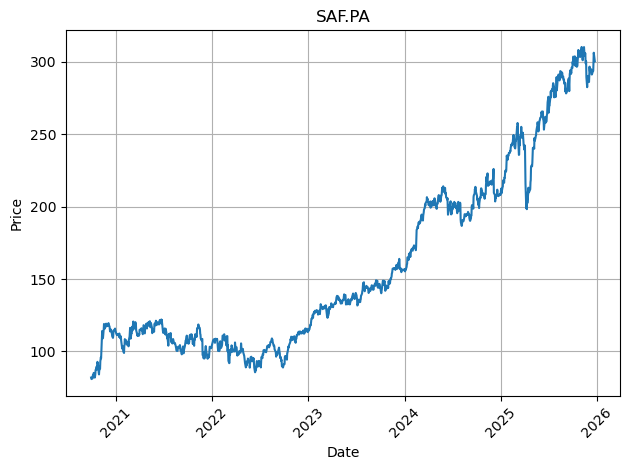

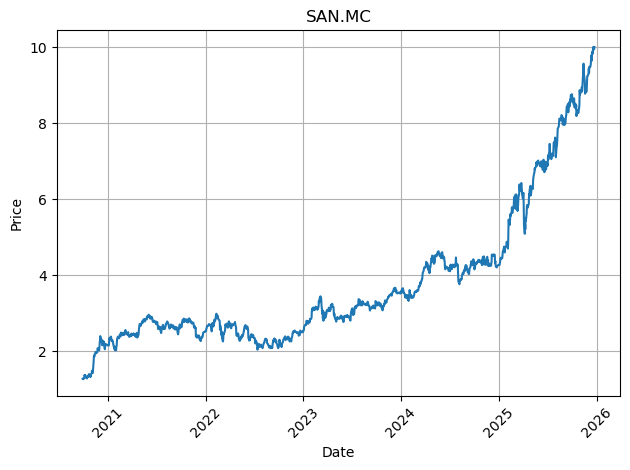

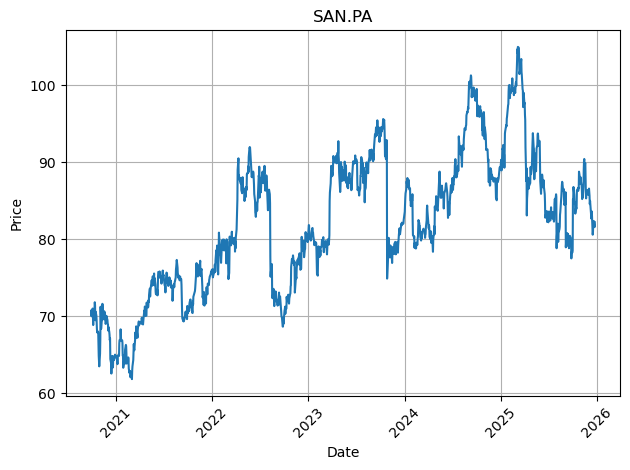

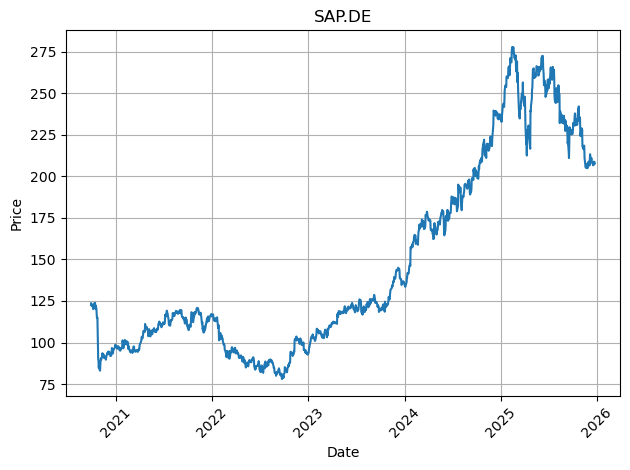

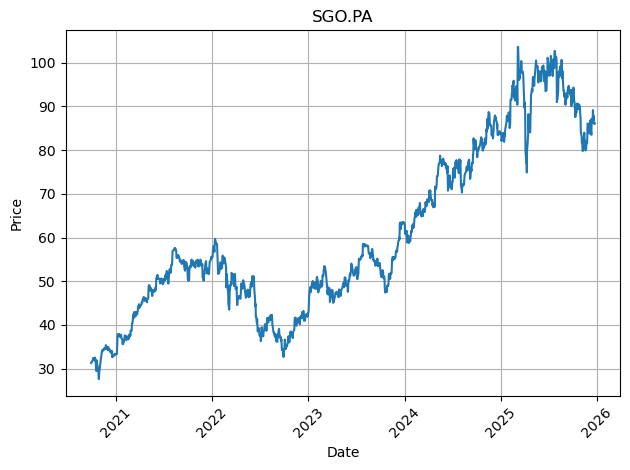

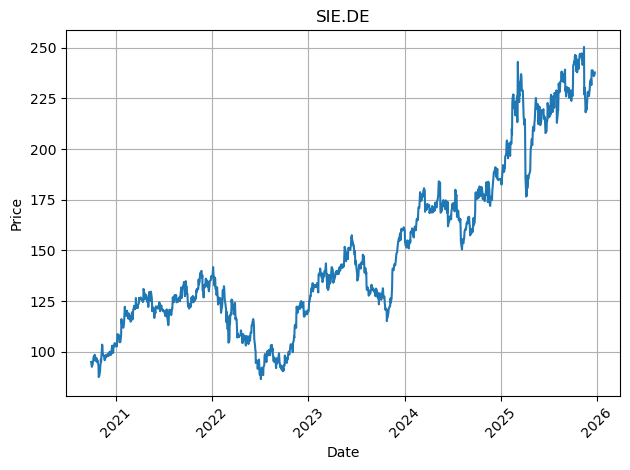

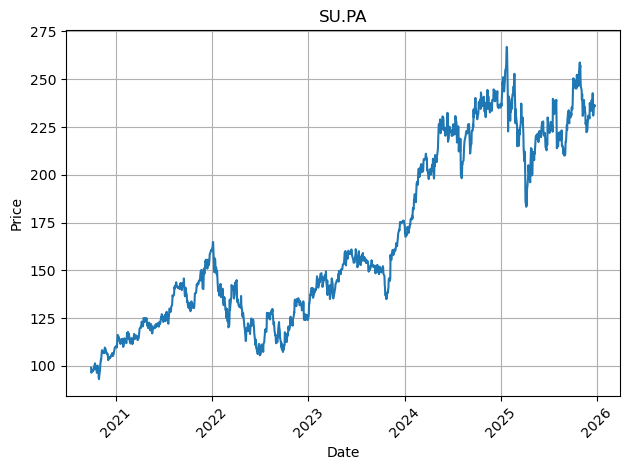

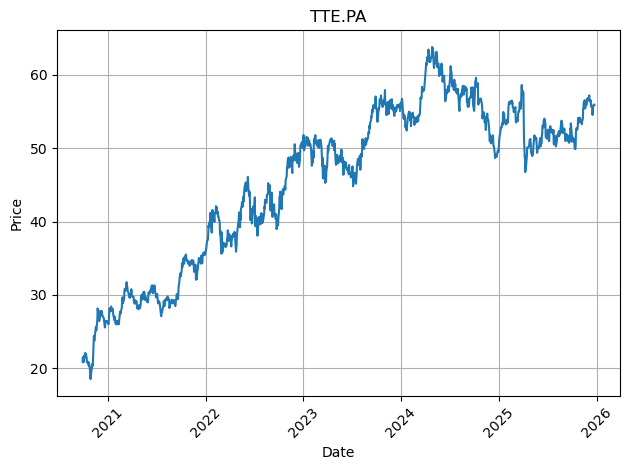

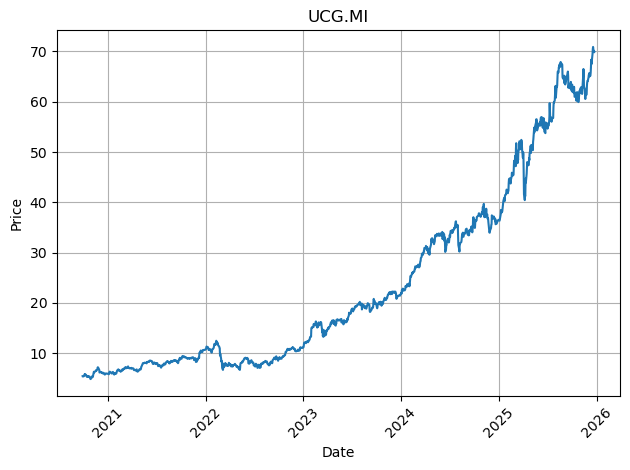

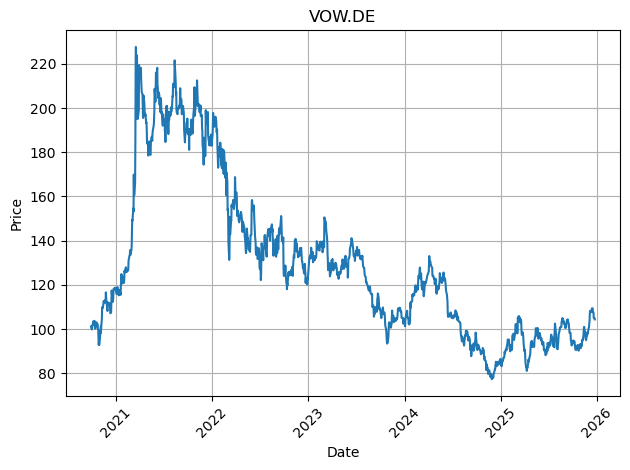

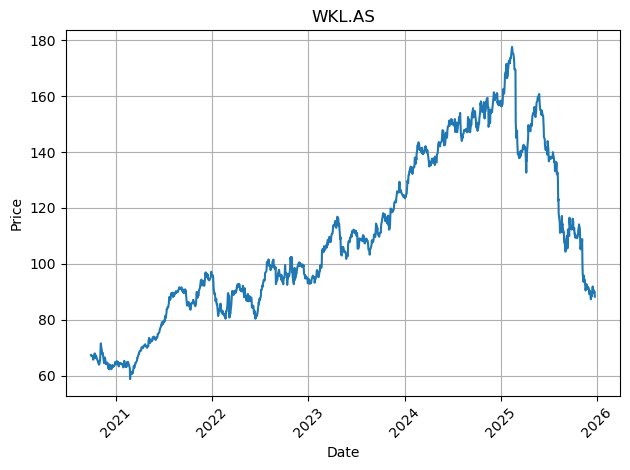

In [24]:
p_d['Date'] = pd.to_datetime(p_d['Date'])
p_d.set_index('Date', inplace = True)

for ticker in p_d.columns:
    plt.figure()
    plt.plot(p_d.index, p_d[ticker])
    plt.title(ticker)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [26]:
import numpy as np
r_d = np.log(p_d/p_d.shift())
r_d = r_d.dropna()
r_d.head(2)

ABI.BR     AD.AS    ADS.DE  ADYEN.AS     AI.PA    AIR.PA  \
Date                                                                     
2020-09-30 -0.001621 -0.011028 -0.018303 -0.018898 -0.014652 -0.008343   
2020-10-01 -0.009237 -0.000396  0.010090  0.020457 -0.003326  0.044585   

              ALV.DE   ARGX.BR   ASML.AS    BAS.DE  ...    SAN.MC    SAN.PA  \
Date                                                ...                       
2020-09-30 -0.007671  0.011623 -0.011217 -0.006902  ...  0.004637 -0.009912   
2020-10-01 -0.008840  0.013245  0.021067 -0.011805  ... -0.012329 -0.000352   

              SAP.DE    SGO.PA    SIE.DE     SU.PA    TTE.PA    UCG.MI  \
Date                                                                     
2020-09-30 -0.010490  0.002781 -0.007020 -0.026519  0.030247  0.003128   
2020-10-01  0.007355  0.004710 -0.011373  0.002825 -0.024615 -0.012426   

              VOW.DE    WKL.AS  
Date                            
2020-09-30 -0.007346 -0.006022  
2020-10-01 -0.002080  0.001097  

[2 rows x 49 columns]

Text(0.5, 1.0, 'z-score (r_VOW)')

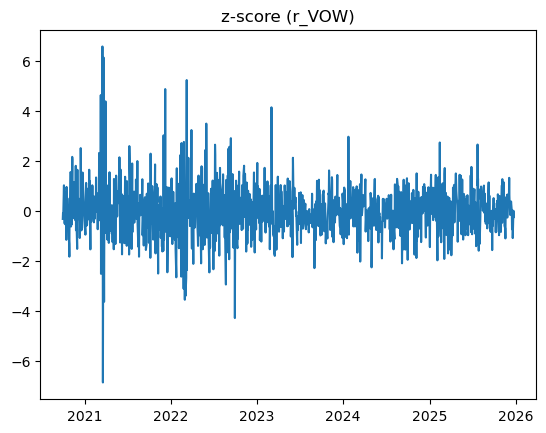

In [27]:
from scipy import stats

plt.plot(r_d.index, stats.zscore(r_d['VOW.DE']))
plt.title('z-score (r_VOW)')

In [47]:
def print_z(r, d, p):
    z = stats.zscore(r)
    tickers = r.agg(['mean']).T.index

    counter = 0
    for i in tickers:
        print(i)
        x = r.index
        y = z[:, counter]

        filter = np.abs(y)>d
        plt.figure(figsize = (12,6))
        plt.scatter(x[filter], y[filter])  
        plt.pause(p)
        counter +=1

ABI.BR


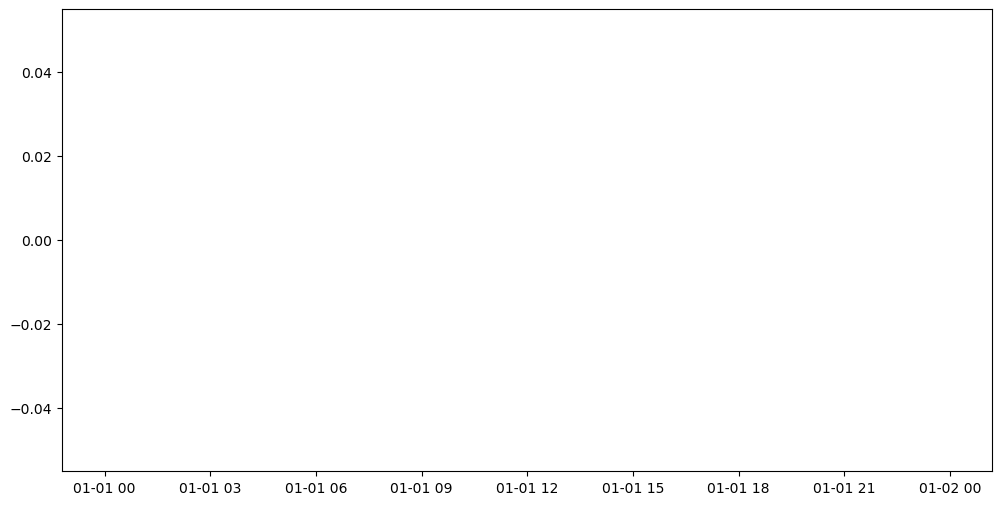

AD.AS


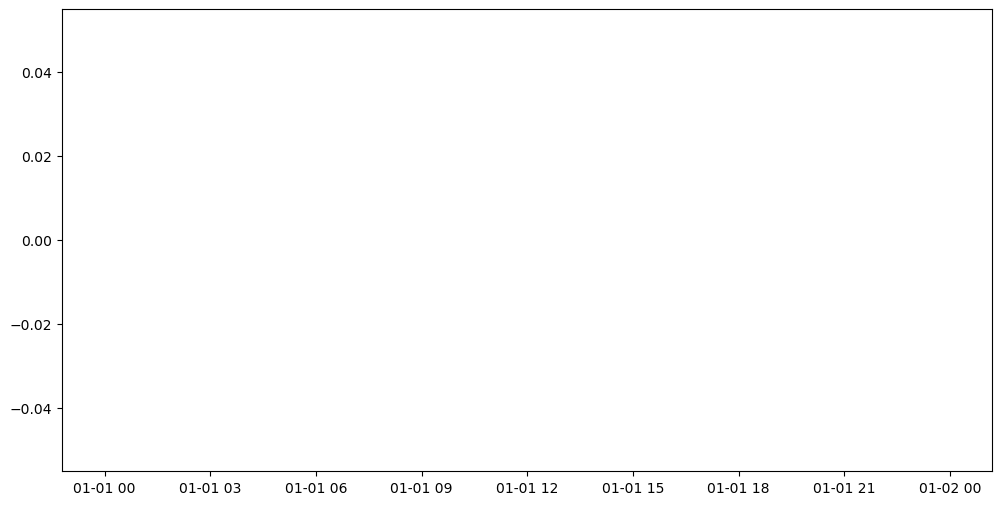

ADS.DE


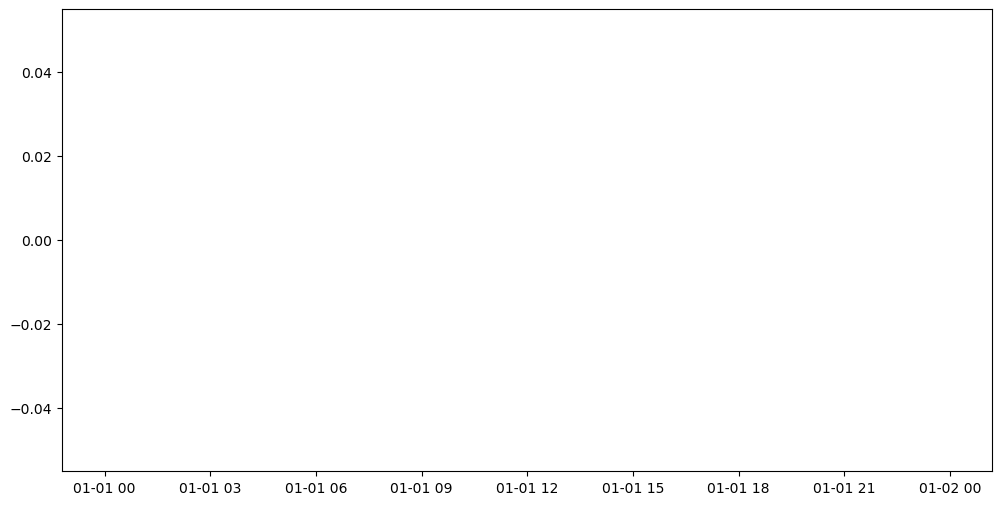

ADYEN.AS


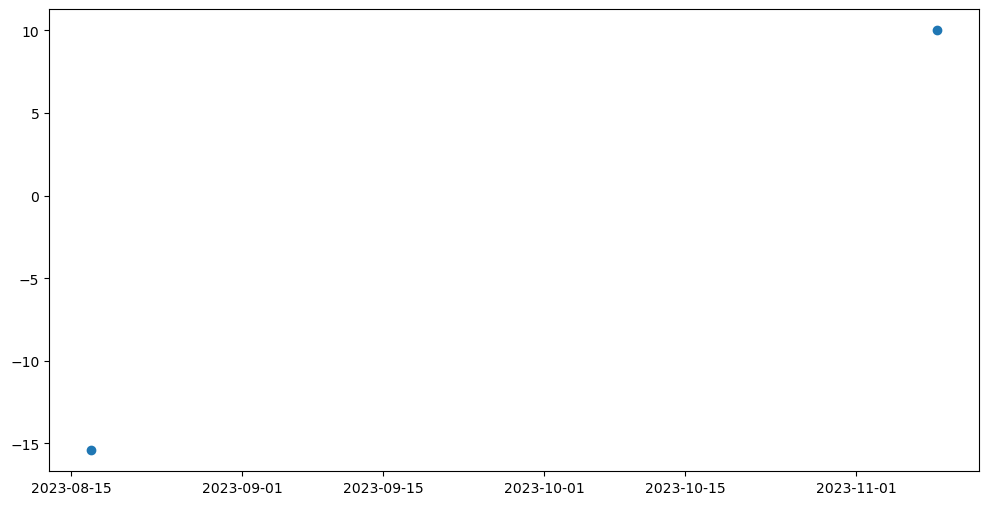

AI.PA


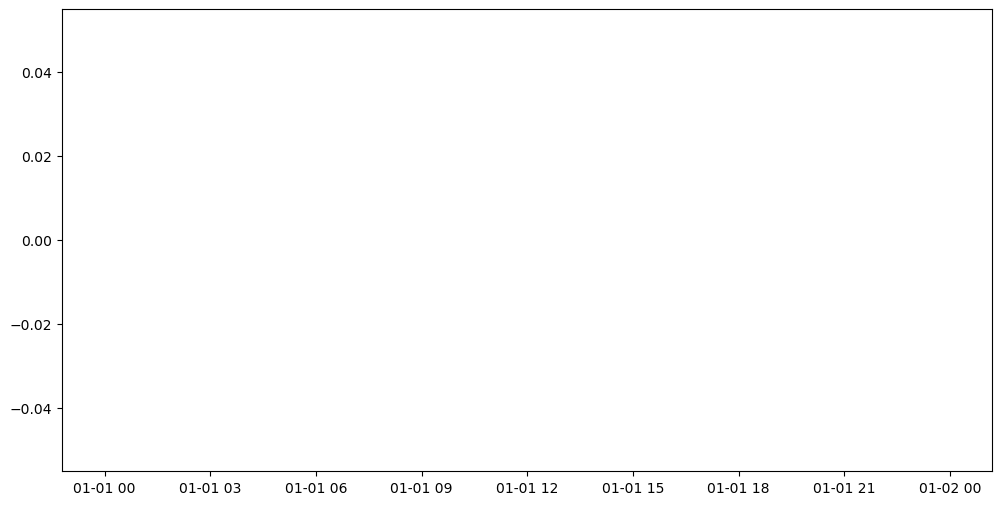

AIR.PA


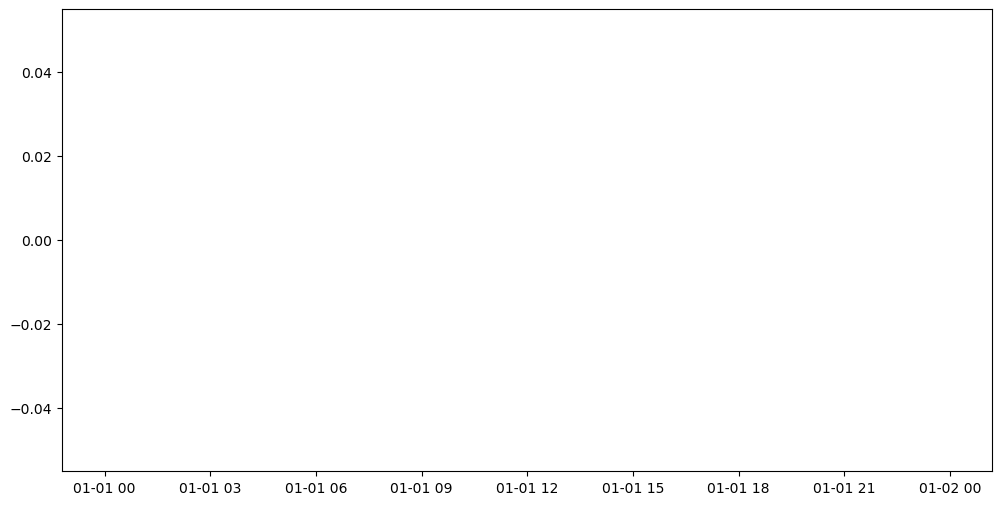

ALV.DE


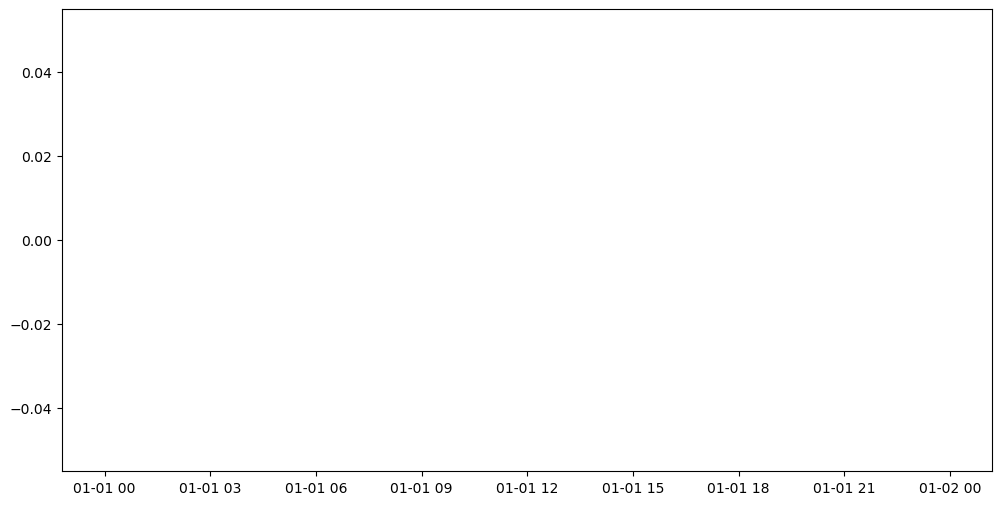

ARGX.BR


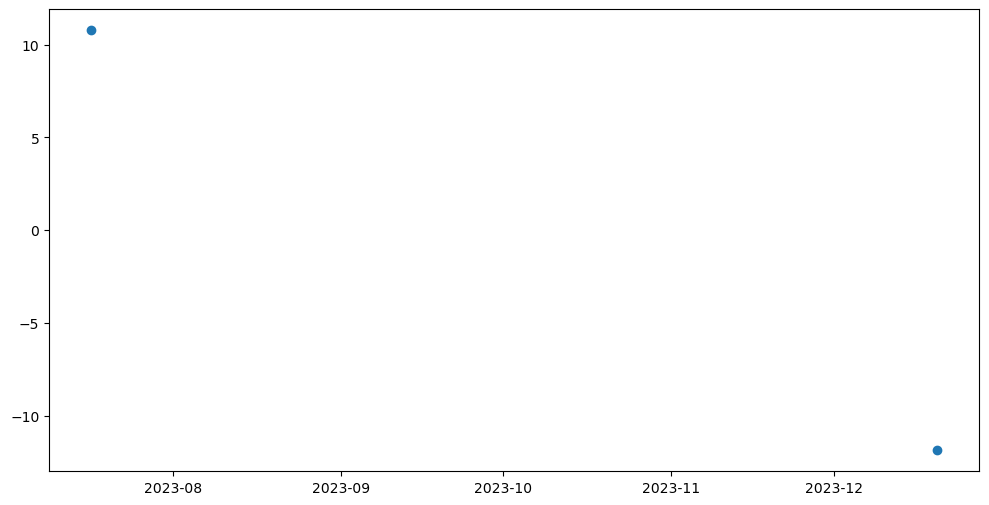

ASML.AS


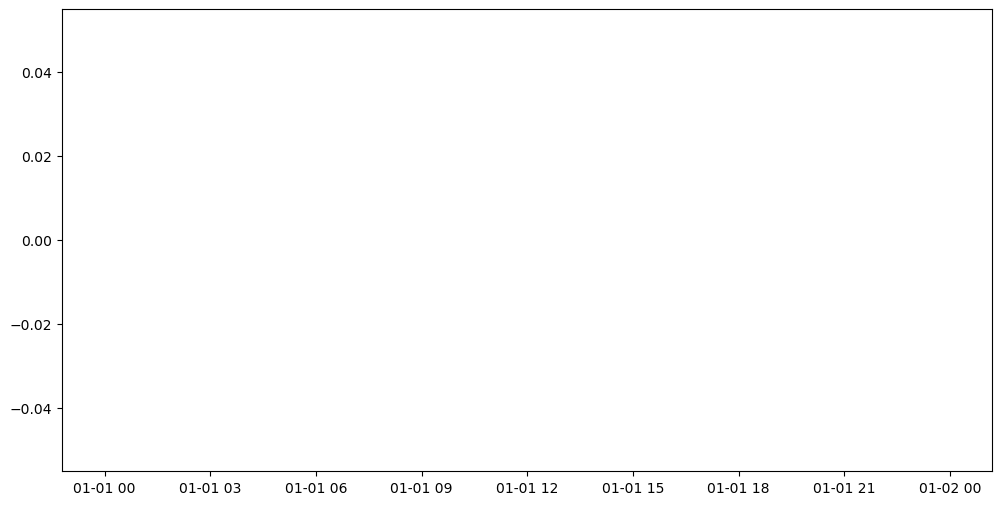

BAS.DE


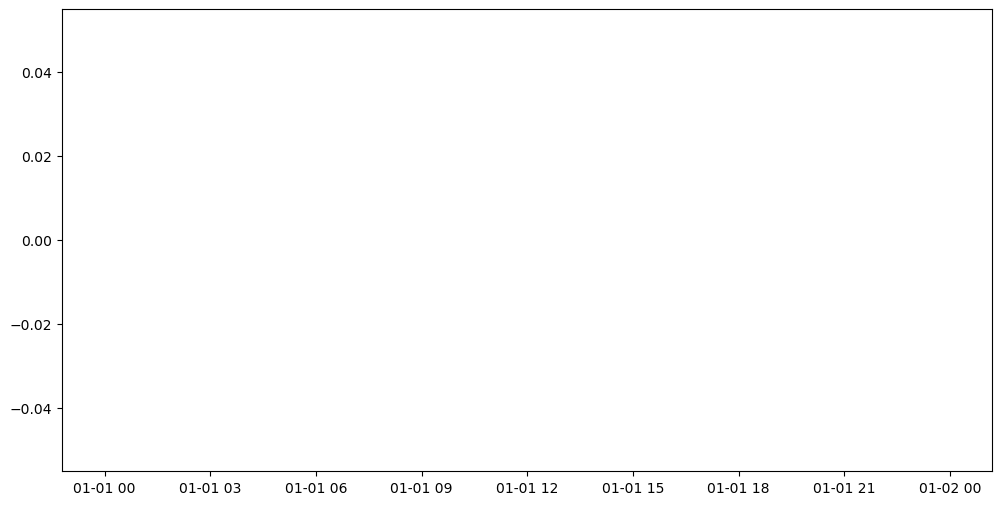

BAYN.DE


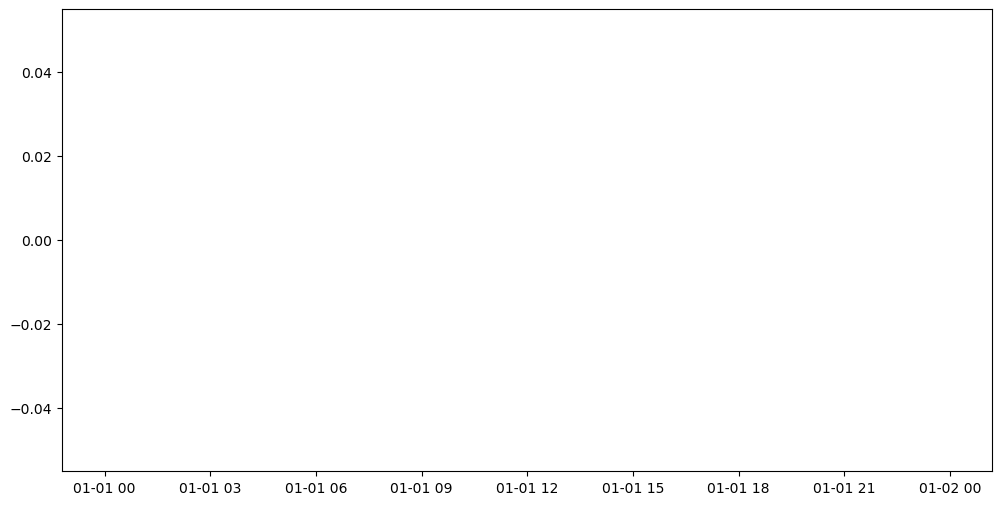

BBVA.MC


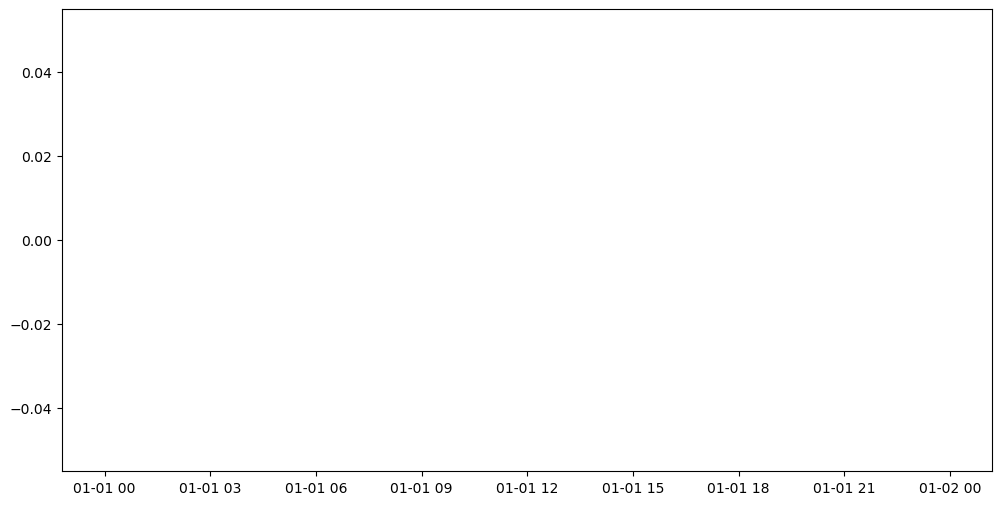

BMW.DE


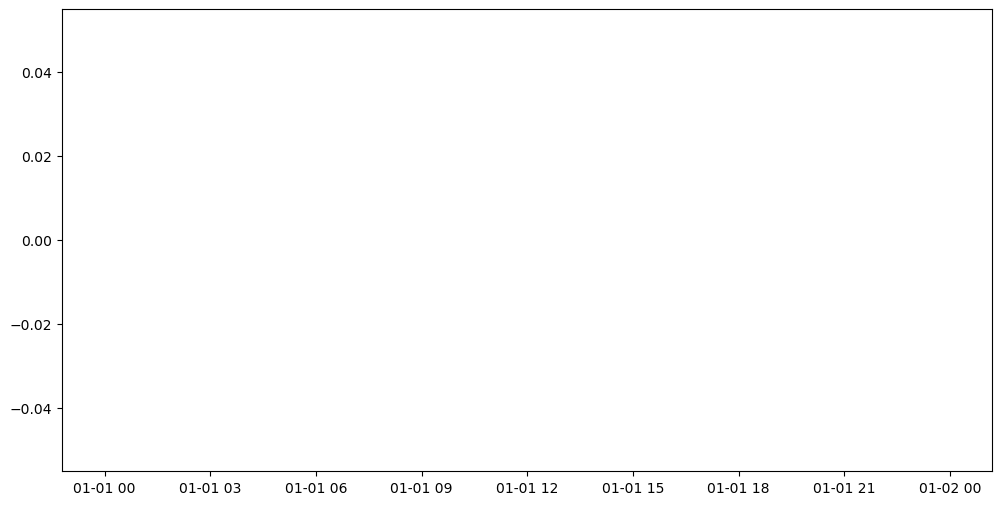

BN.PA


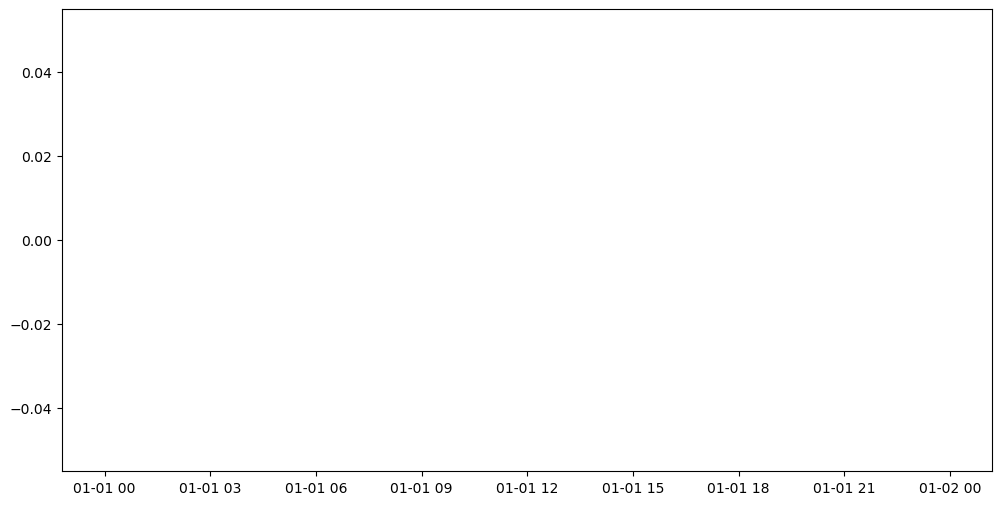

BNP.PA


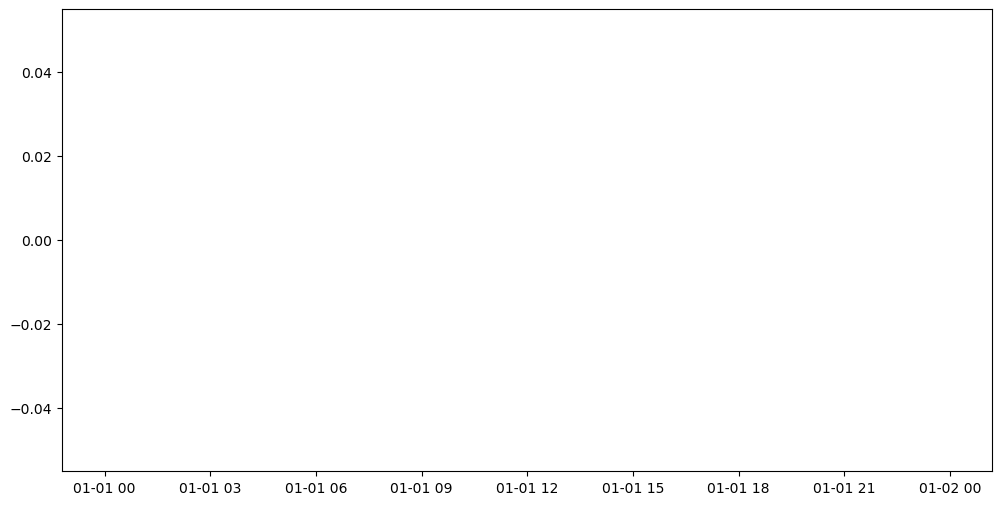

CS.PA


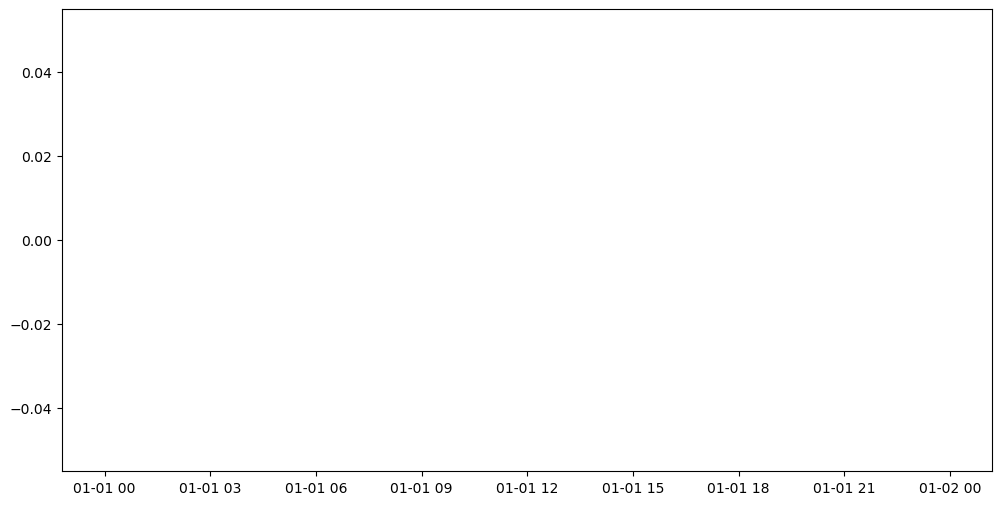

DB1.DE


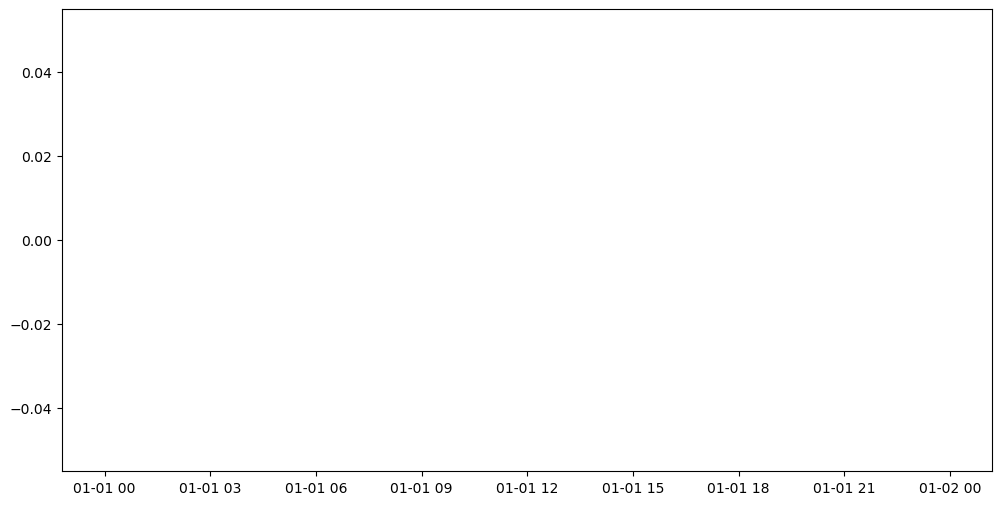

DG.PA


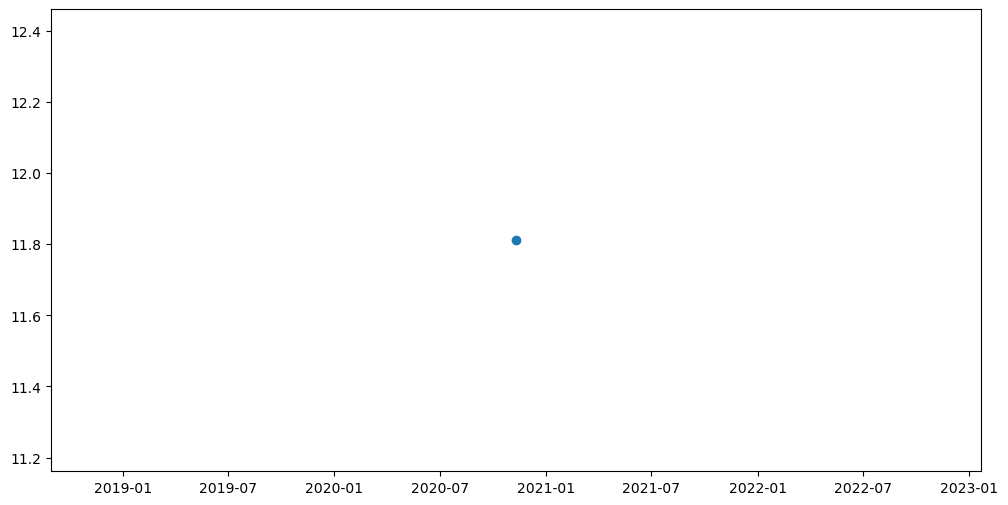

DHL.DE


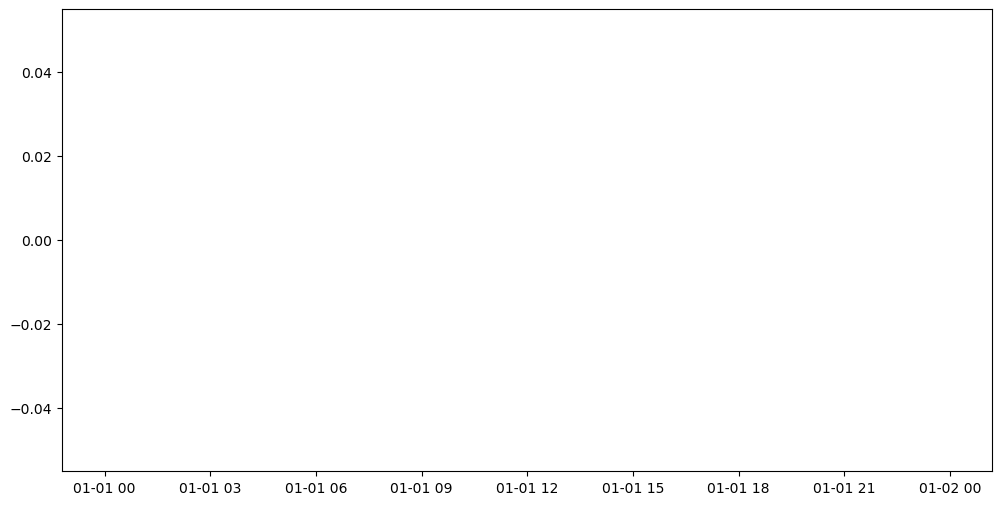

DTE.DE


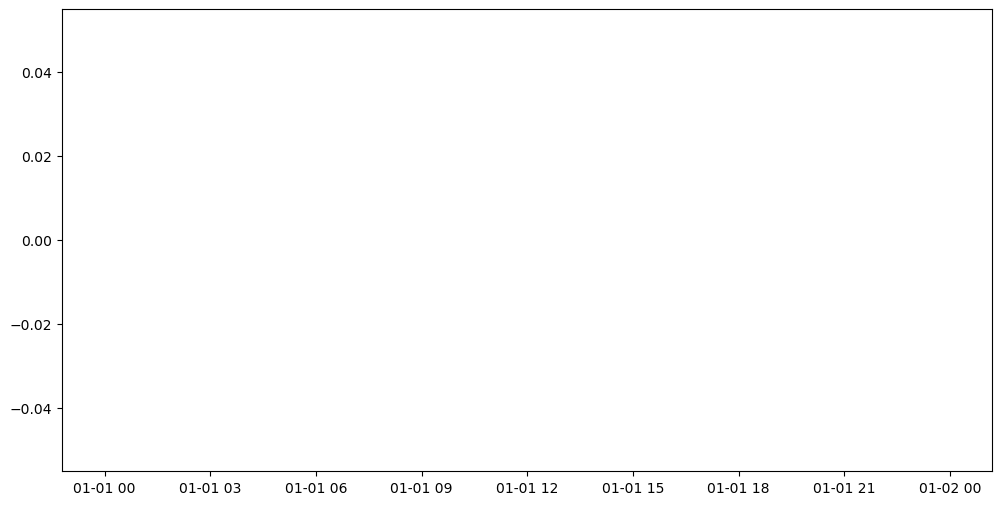

EL.PA


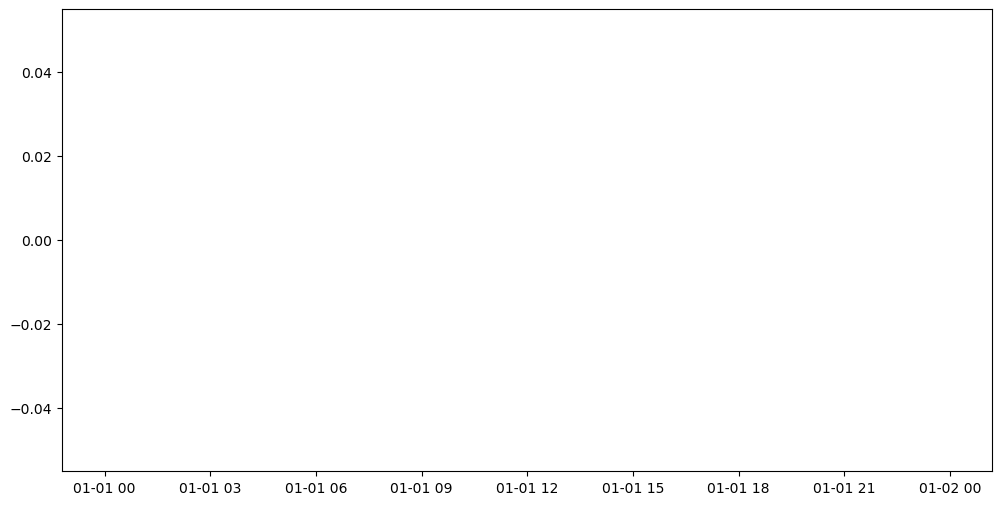

ENEL.MI


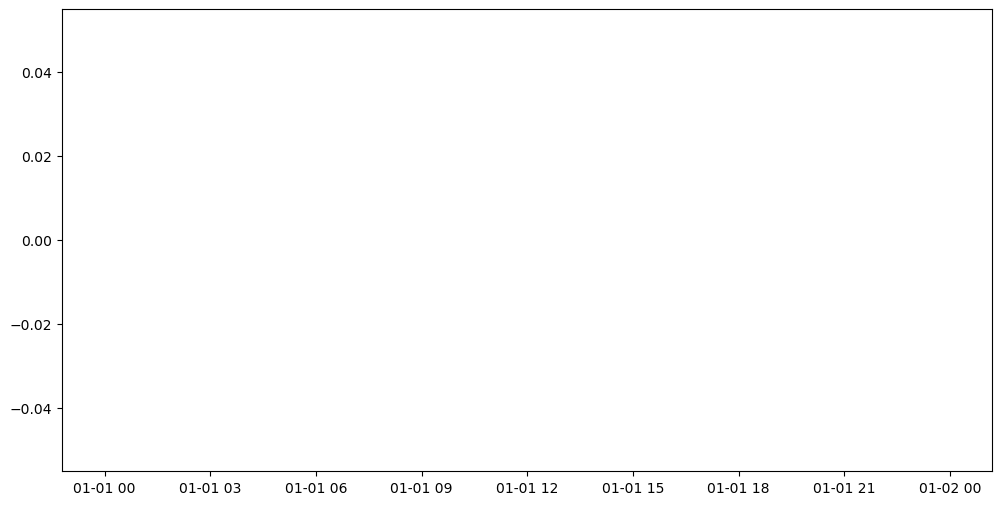

ENI.MI


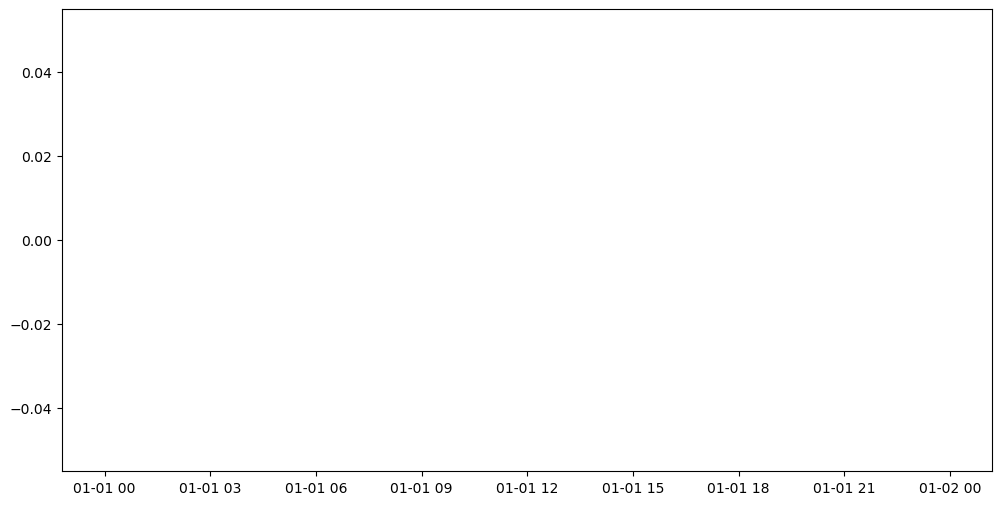

ENR.DE


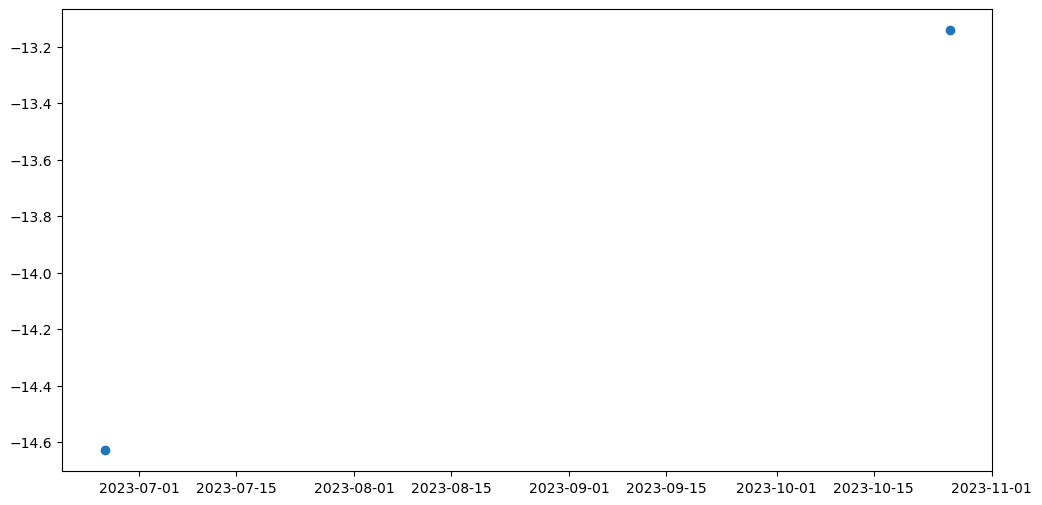

IBE.MC


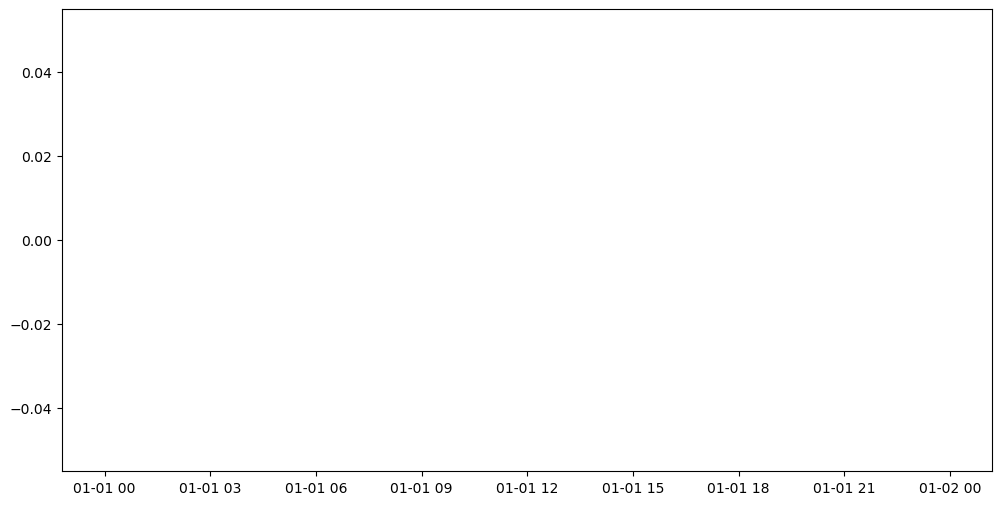

IFX.DE


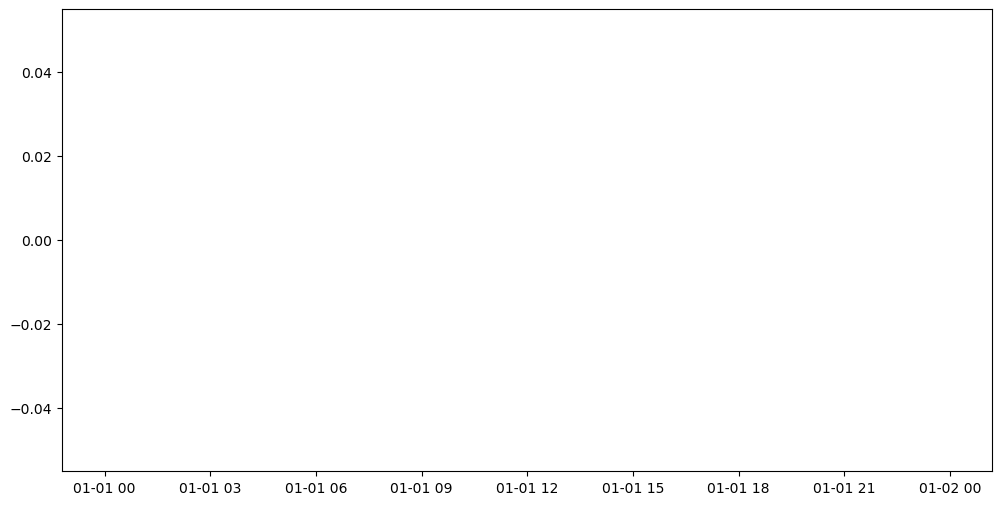

INGA.AS


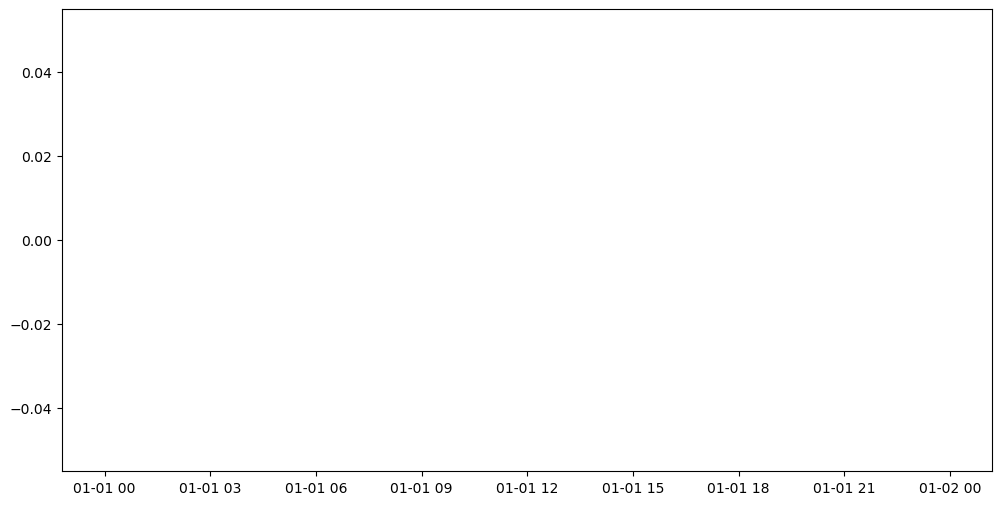

ISP.MI


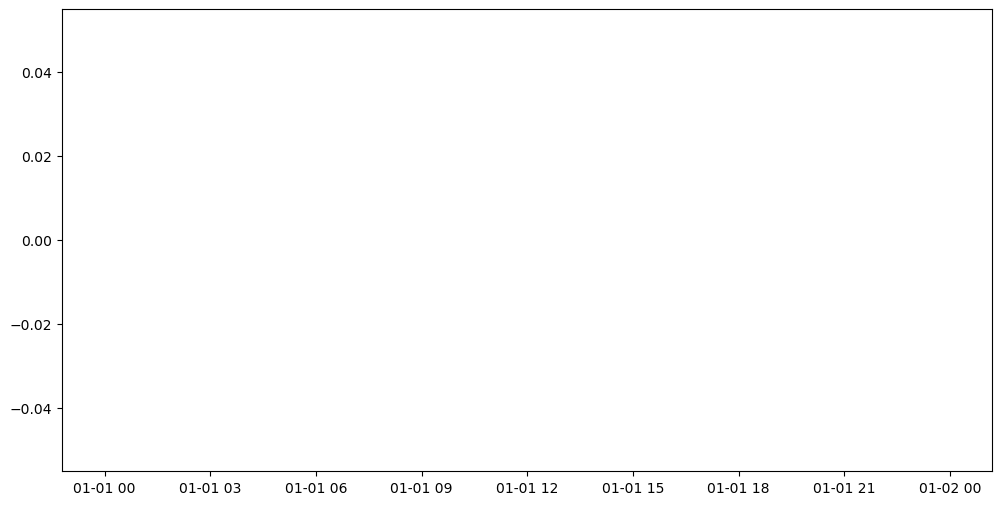

ITX.MC


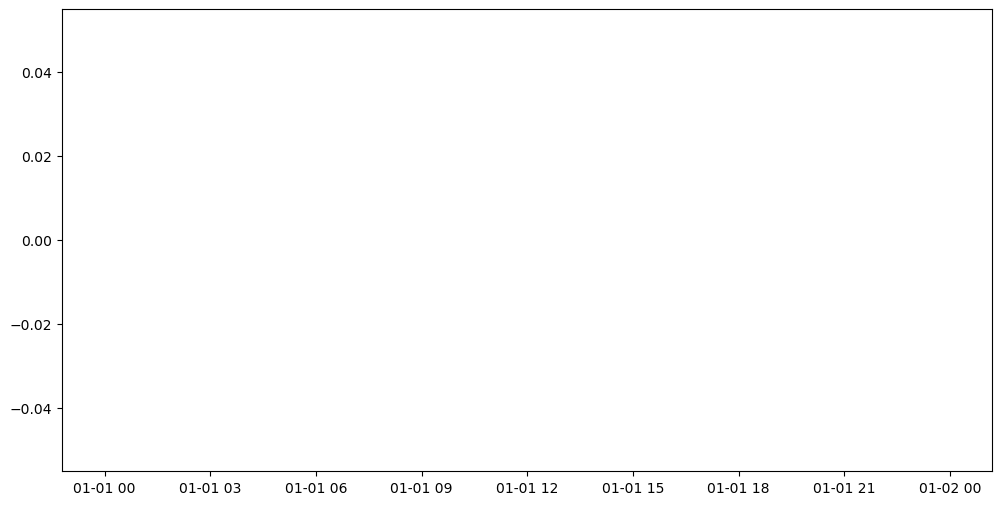

MBG.DE


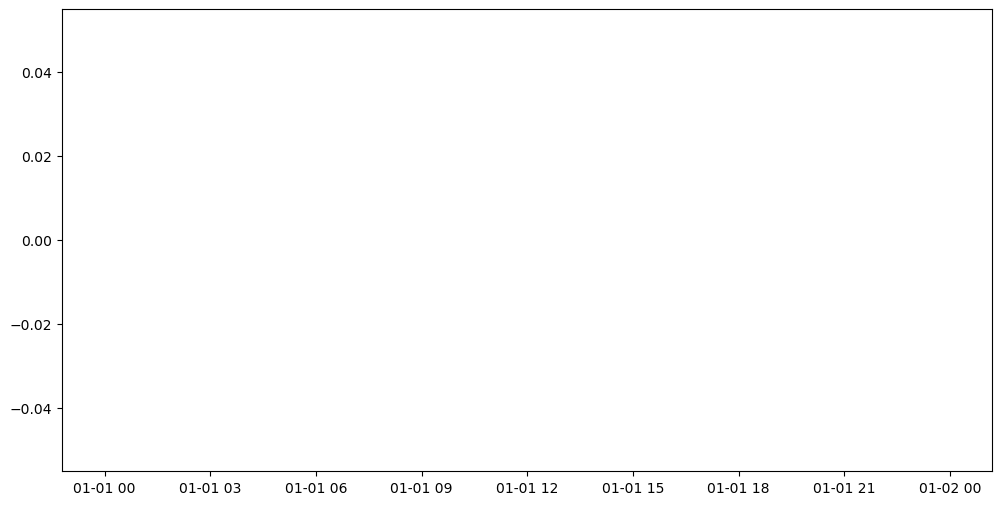

MC.PA


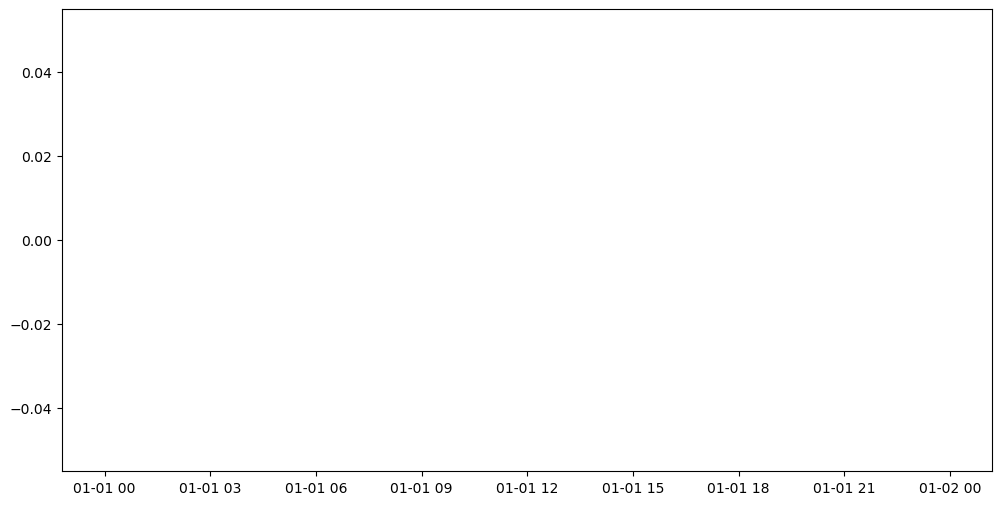

MUV2.DE


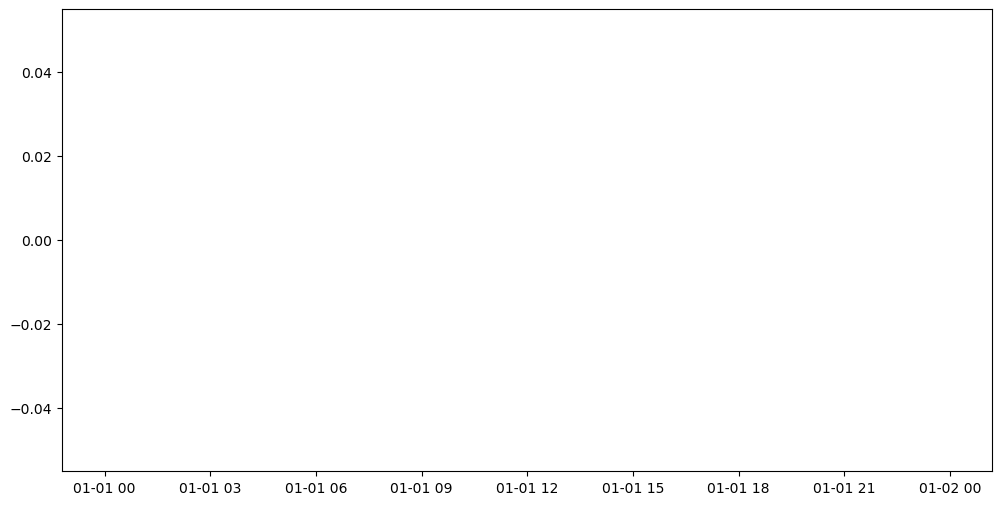

NDA-FI.HE


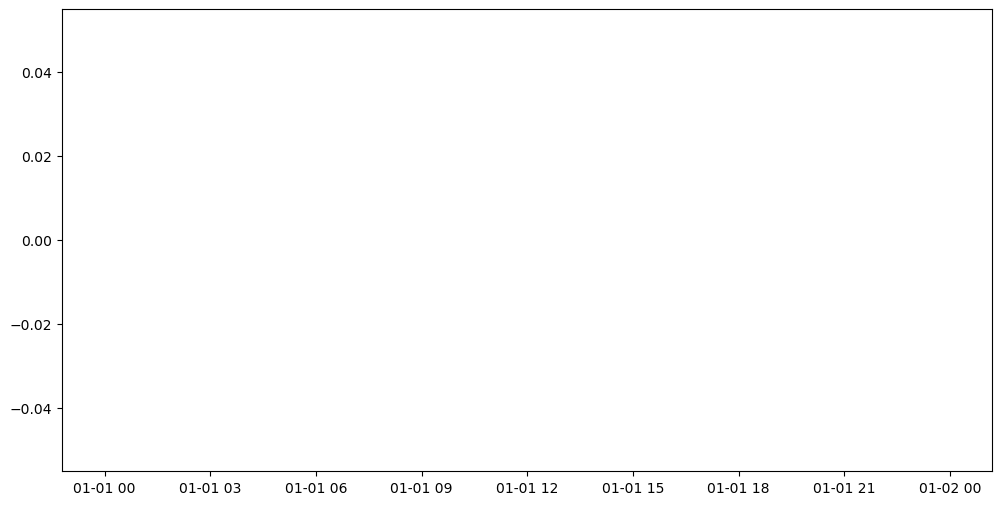

OR.PA


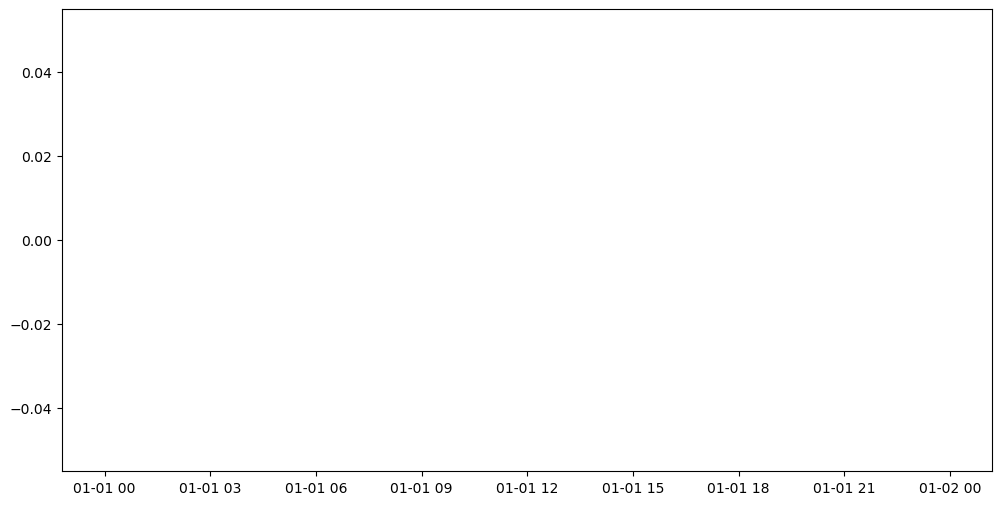

PRX.AS


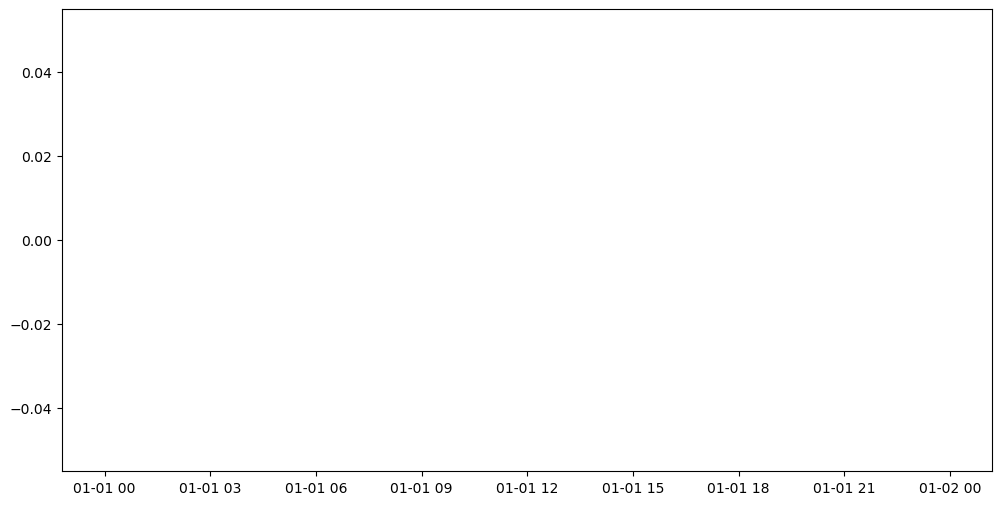

RACE.MI


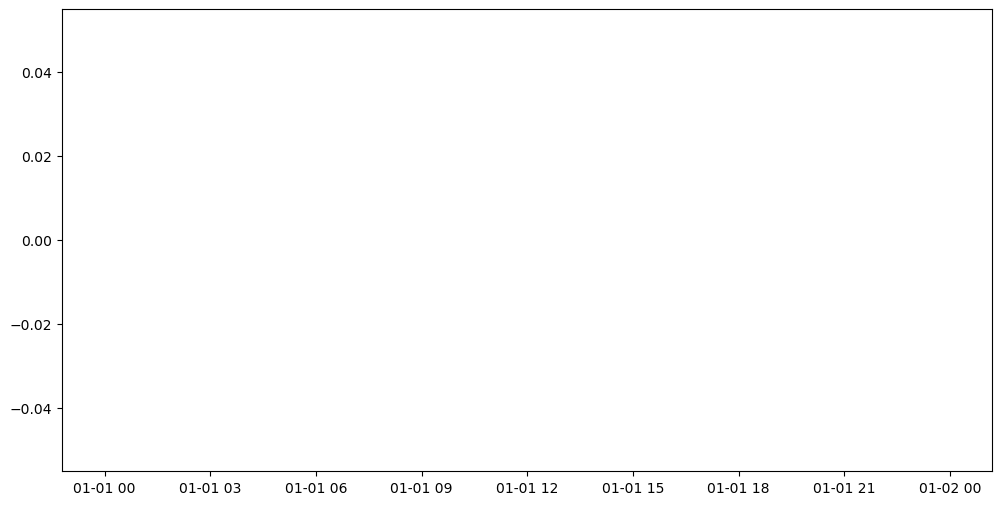

RHM.DE


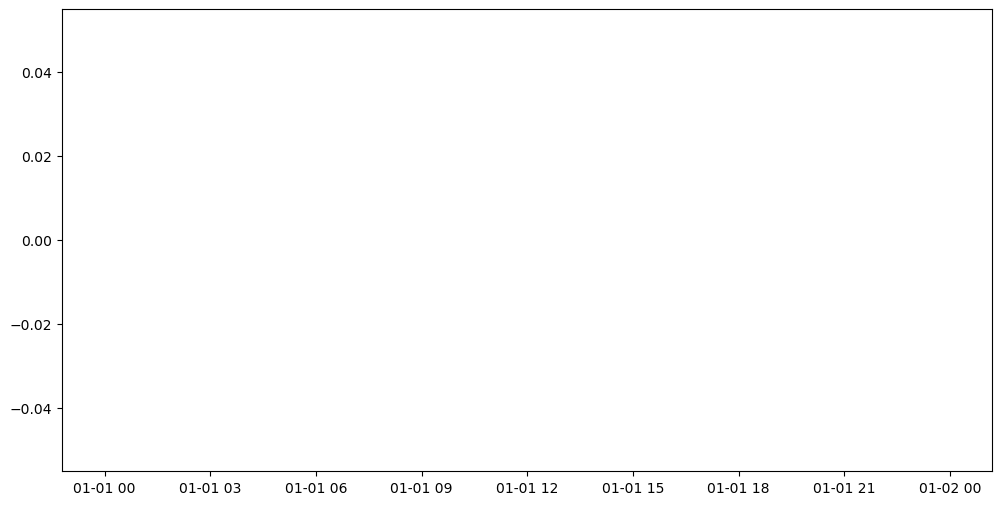

RMS.PA


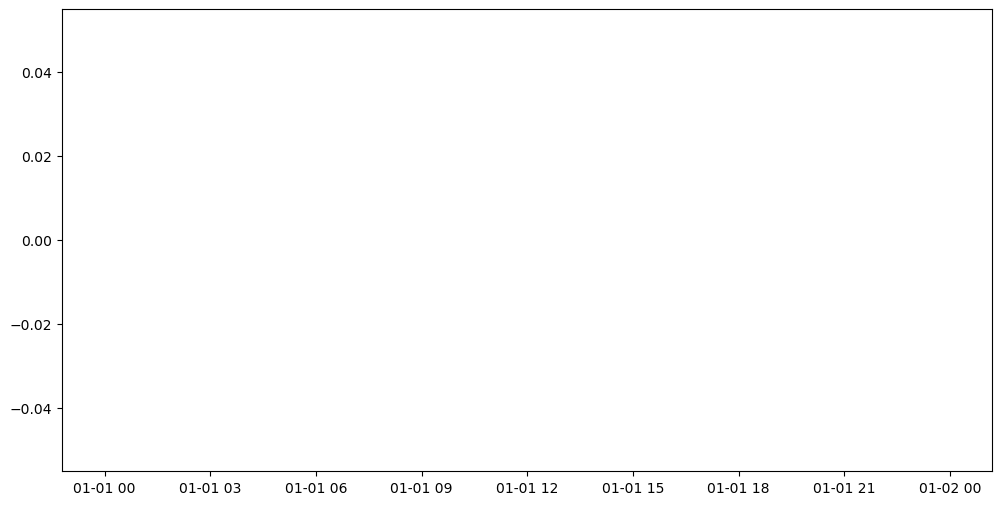

SAF.PA


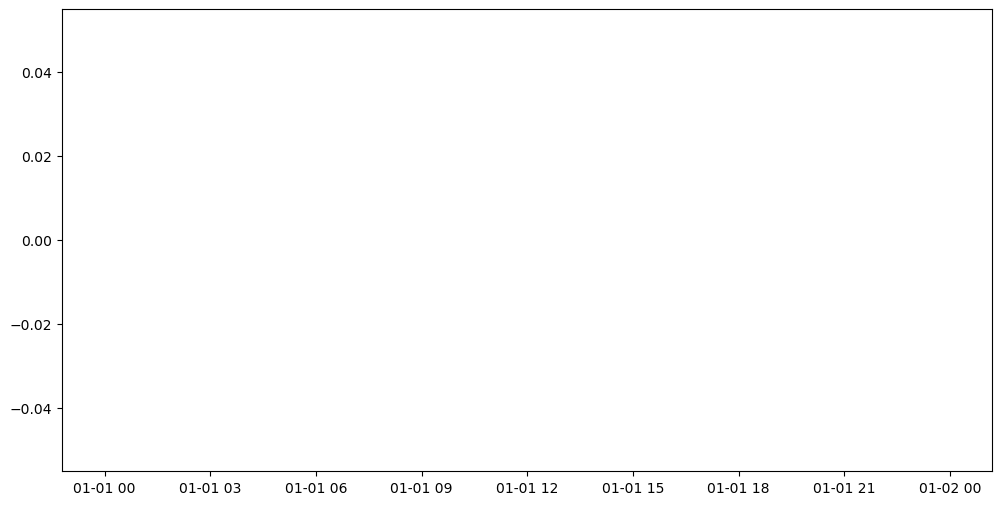

SAN.MC


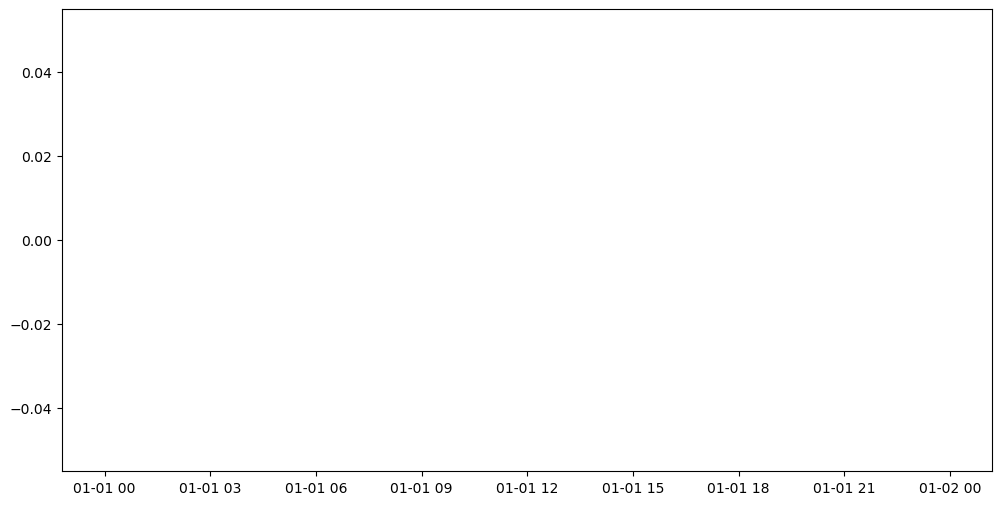

SAN.PA


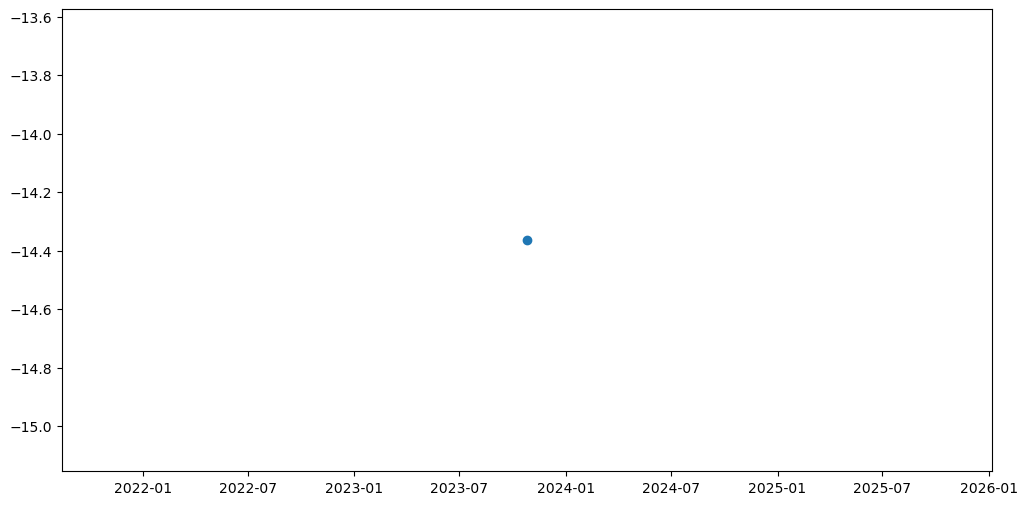

SAP.DE


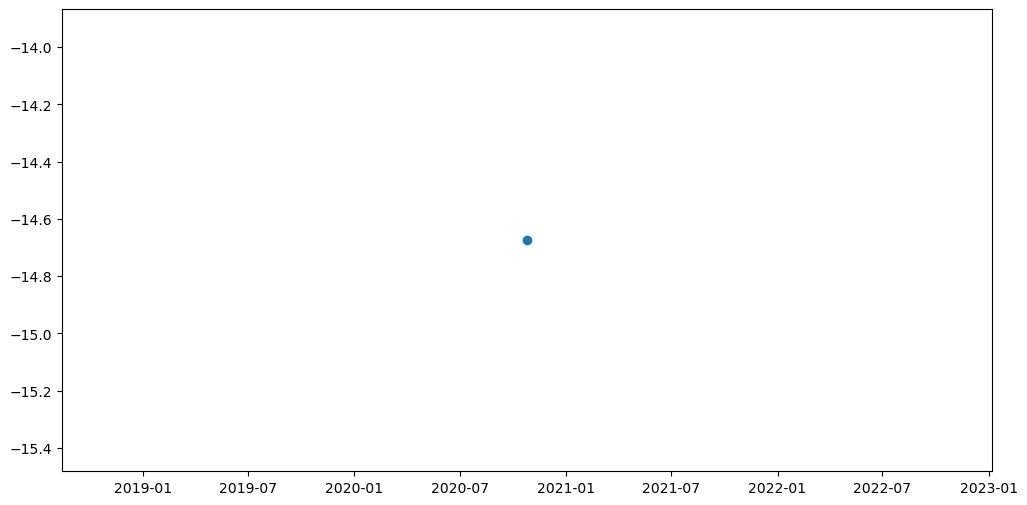

SGO.PA


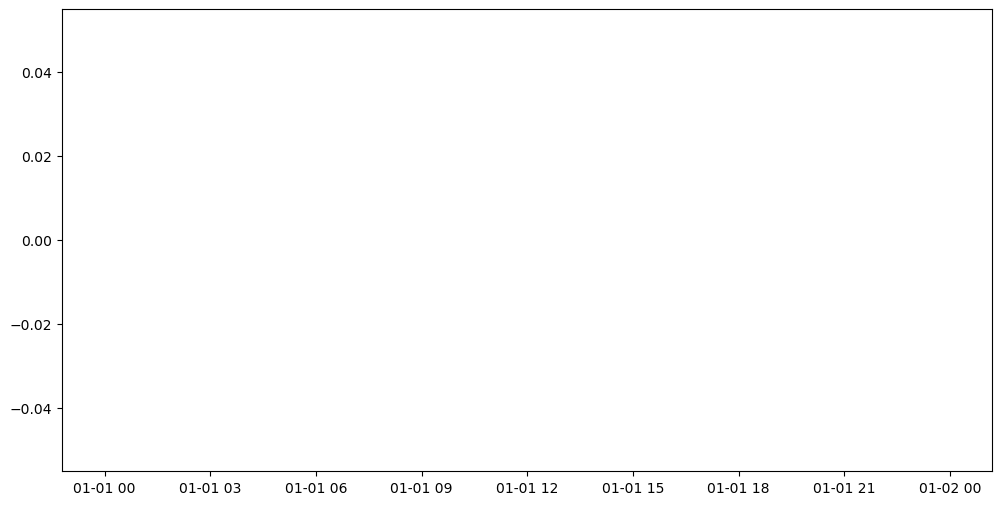

SIE.DE


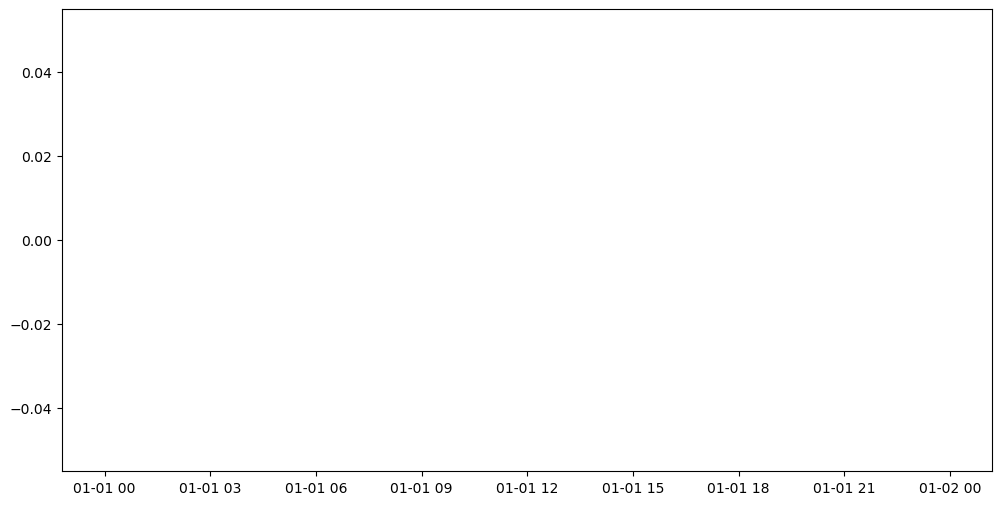

SU.PA


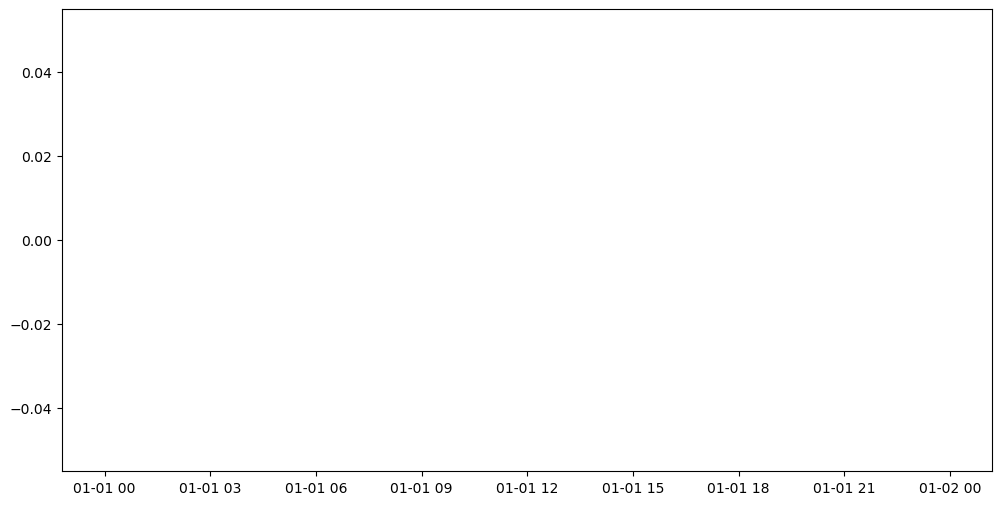

TTE.PA


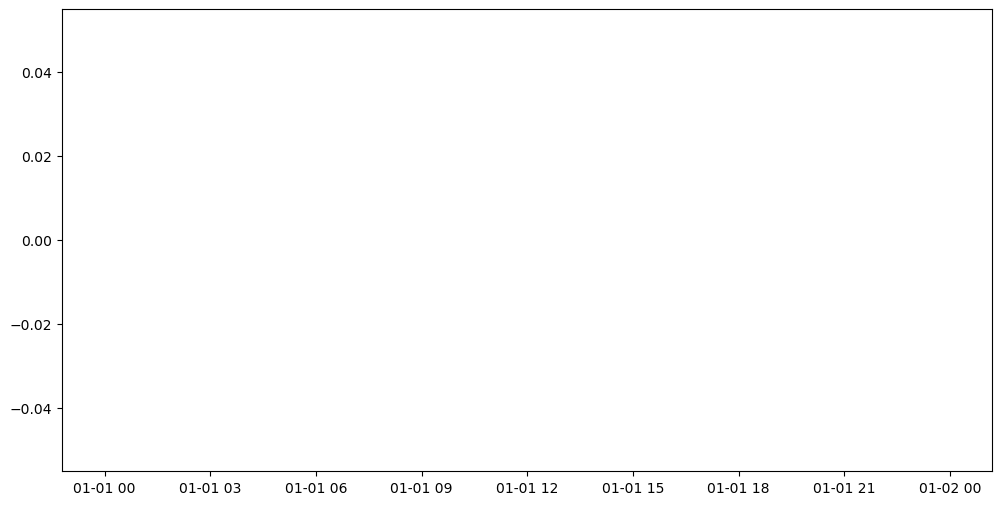

UCG.MI


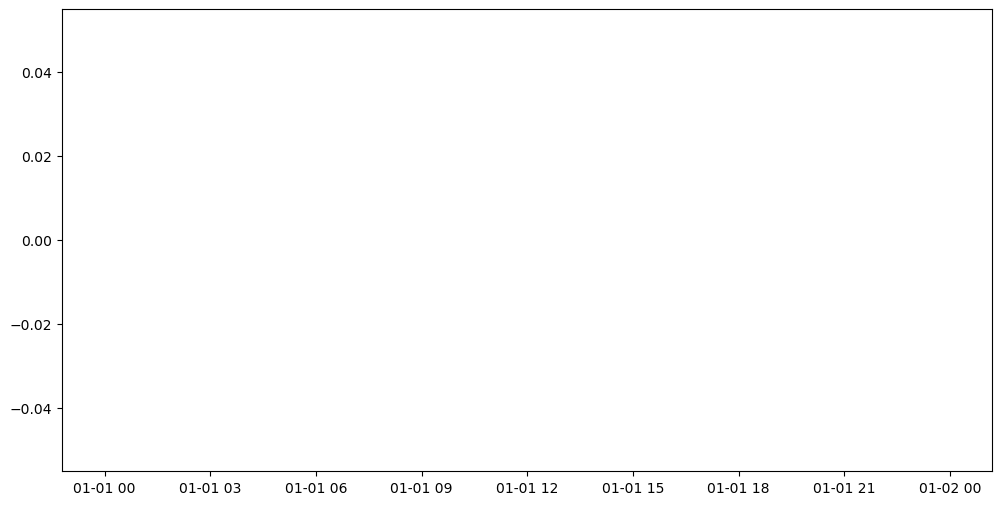

VOW.DE


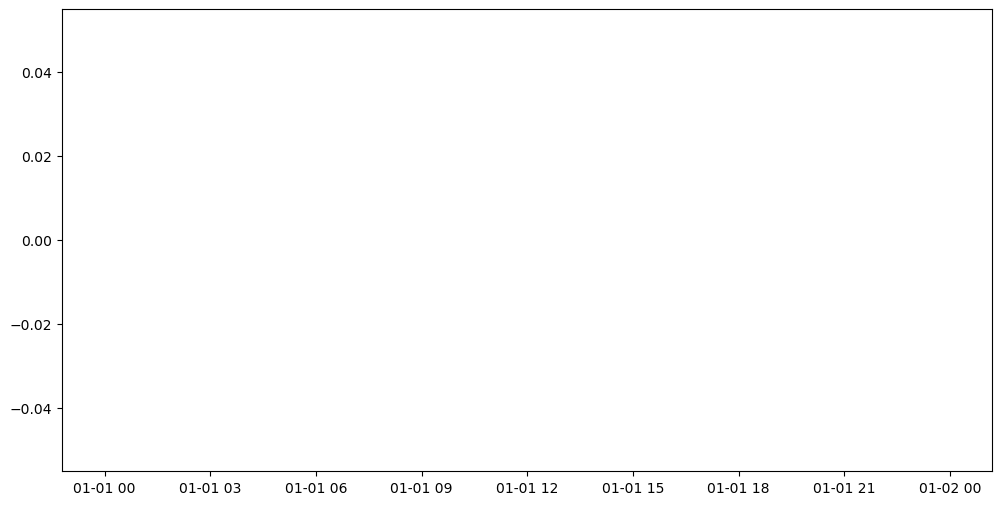

WKL.AS


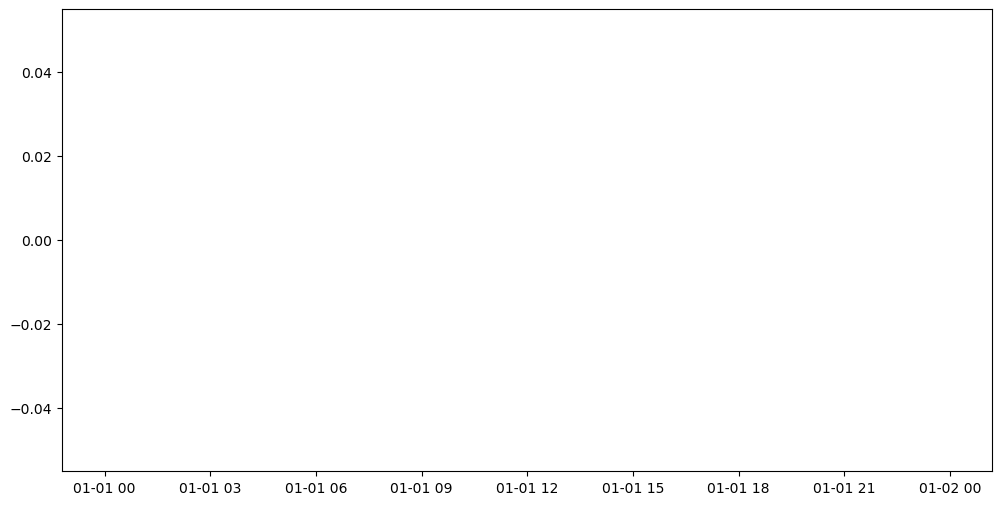

In [48]:
print_z(r_d, 10, 1)

In [50]:
#Vol
r_d['ENR.DE'].std()*np.sqrt(252)

np.float64(0.5313168640088918)

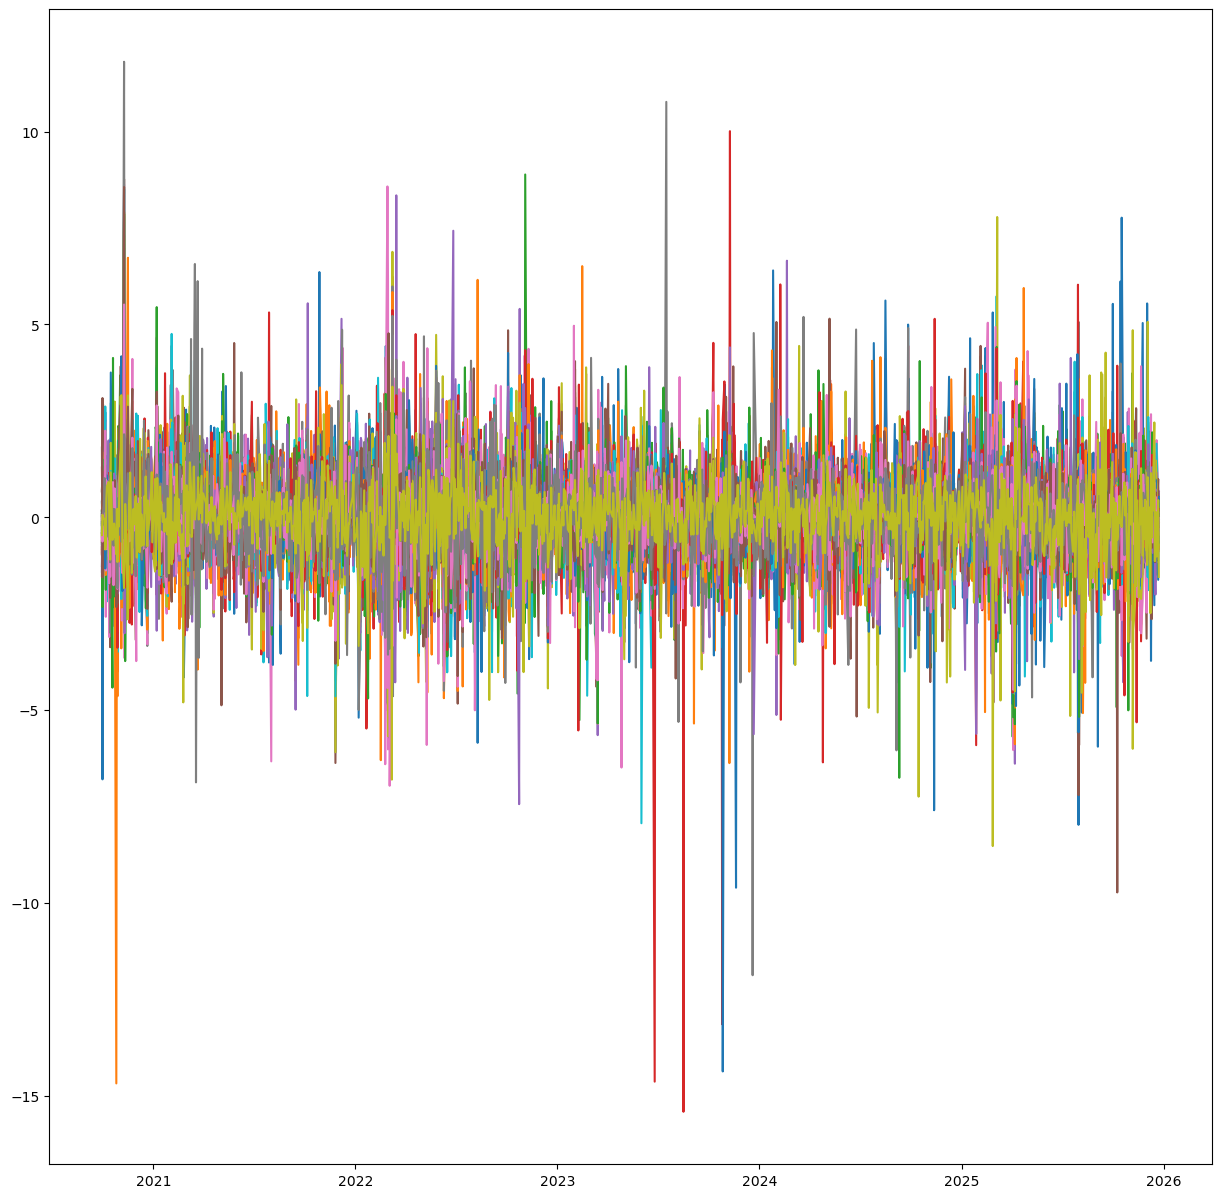

In [53]:
#plt z (r_d)
plt.figure(figsize=(15,15))
plt.plot(r_d.index, stats.zscore(r_d))

In [55]:
InvOpp = r_d.agg(['mean', 'std']).T
InvOpp['mean'] = InvOpp['mean']*252
InvOpp['std'] = InvOpp['std']*np.sqrt(252)
InvOpp

mean       std
ABI.BR     0.043208  0.245114
AD.AS      0.092193  0.187299
ADS.DE    -0.094668  0.346889
ADYEN.AS  -0.031159  0.508974
AI.PA      0.083257  0.188637
AIR.PA     0.233705  0.306751
ALV.DE     0.213250  0.204960
ARGX.BR    0.226493  0.396981
ASML.AS    0.210449  0.374948
BAS.DE     0.025136  0.281462
BAYN.DE   -0.053628  0.327113
BBVA.MC    0.467710  0.330538
BMW.DE     0.133314  0.279418
BN.PA      0.095336  0.185830
BNP.PA     0.250979  0.302494
CS.PA      0.242220  0.222380
DB1.DE     0.094541  0.197784
DG.PA      0.132042  0.231454
DHL.DE     0.050642  0.270152
DTE.DE     0.158343  0.191479
EL.PA      0.184996  0.247936
ENEL.MI    0.089118  0.213700
ENI.MI     0.232666  0.240799
ENR.DE     0.329031  0.531317
IBE.MC     0.147162  0.191993
IFX.DE     0.088788  0.373688
INGA.AS    0.333056  0.302180
ISP.MI     0.328110  0.275522
ITX.MC     0.203184  0.263569
MBG.DE     0.150069  0.282920
MC.PA      0.099545  0.298089
MUV2.DE    0.219167  0.236761
NDA-FI.HE  0.250677  0.235666
OR.PA      0.062857  0.239313
PRX.AS     0.079110  0.406816
RACE.MI    0.144498  0.274300
RHM.DE     0.592783  0.405761
RMS.PA     0.207408  0.279310
SAF.PA     0.250170  0.285062
SAN.MC     0.396443  0.325126
SAN.PA     0.029020  0.232170
SAP.DE     0.100039  0.268437
SGO.PA     0.195082  0.301826
SIE.DE     0.176777  0.295290
SU.PA      0.167288  0.283529
TTE.PA     0.189245  0.258959
UCG.MI     0.491403  0.364480
VOW.DE     0.005972  0.355207
WKL.AS     0.051893  0.214420

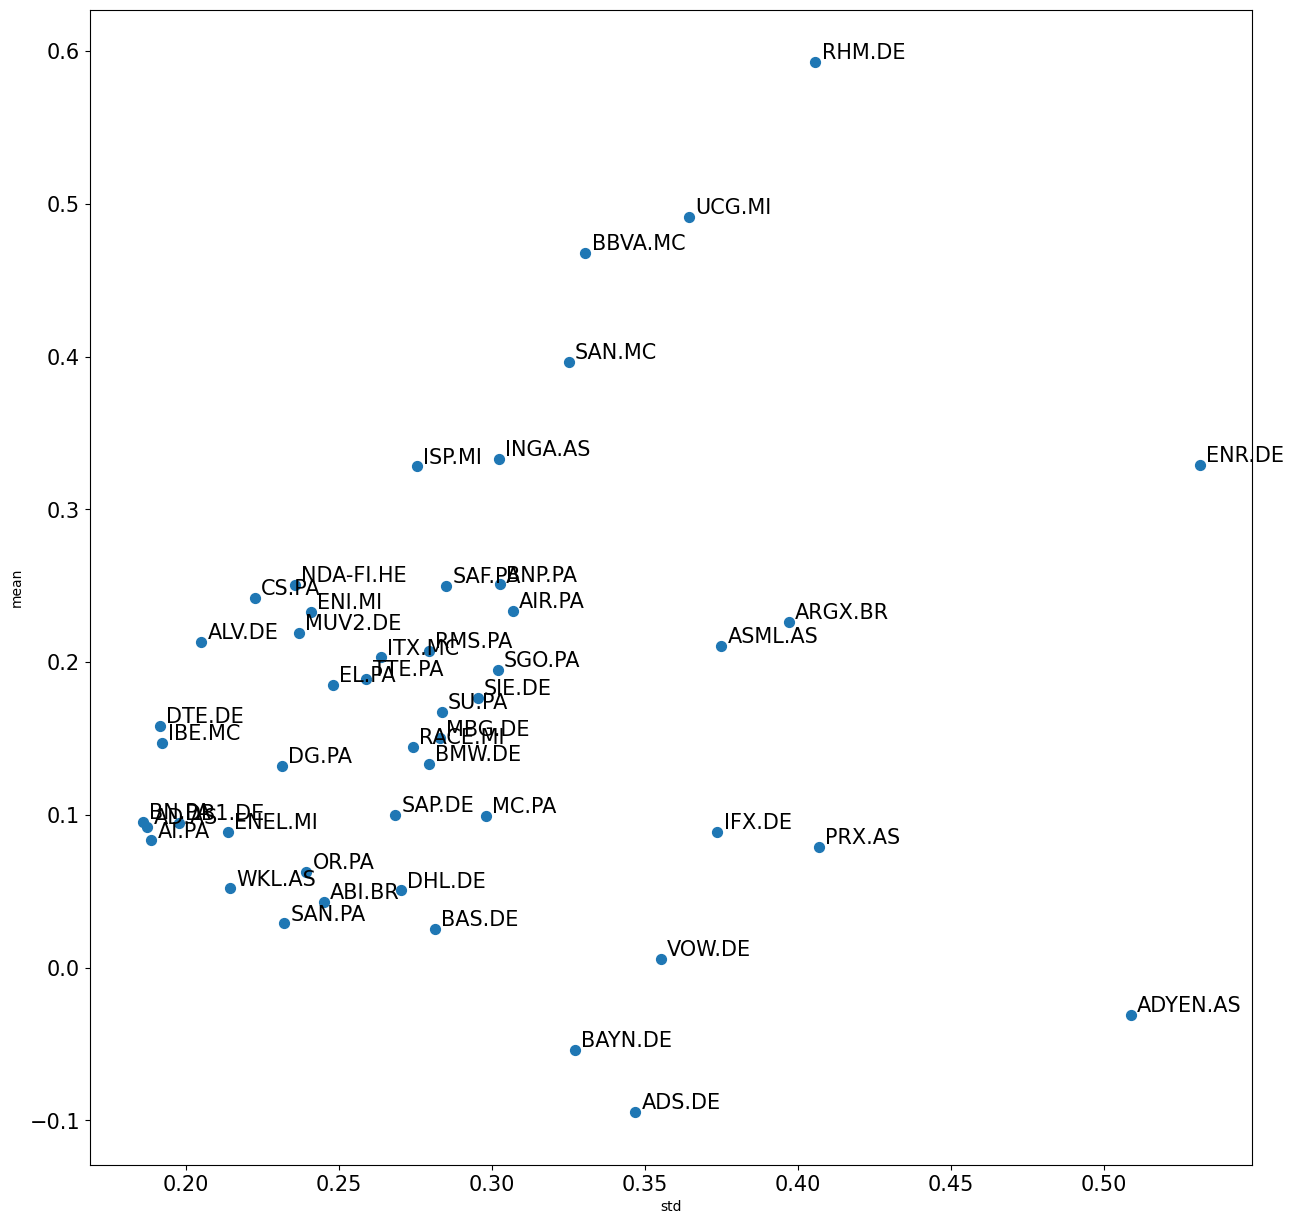

In [62]:
InvOpp.plot(kind = 'scatter', x= 'std', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'std']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)
plt.show()

In [65]:
# 1/n into INv Opp
w_eqw = [1/r_d.shape[1] for i in range(r_d.shape[1])]
r_d['1/N'] = r_d.dot(w_eqw)


In [67]:
InvOpp = r_d.agg(['mean', 'std']).T
InvOpp['mean'] = InvOpp['mean']*252
InvOpp['std'] = InvOpp['std']*np.sqrt(252)
InvOpp

mean       std
ABI.BR     0.043208  0.245114
AD.AS      0.092193  0.187299
ADS.DE    -0.094668  0.346889
ADYEN.AS  -0.031159  0.508974
AI.PA      0.083257  0.188637
AIR.PA     0.233705  0.306751
ALV.DE     0.213250  0.204960
ARGX.BR    0.226493  0.396981
ASML.AS    0.210449  0.374948
BAS.DE     0.025136  0.281462
BAYN.DE   -0.053628  0.327113
BBVA.MC    0.467710  0.330538
BMW.DE     0.133314  0.279418
BN.PA      0.095336  0.185830
BNP.PA     0.250979  0.302494
CS.PA      0.242220  0.222380
DB1.DE     0.094541  0.197784
DG.PA      0.132042  0.231454
DHL.DE     0.050642  0.270152
DTE.DE     0.158343  0.191479
EL.PA      0.184996  0.247936
ENEL.MI    0.089118  0.213700
ENI.MI     0.232666  0.240799
ENR.DE     0.329031  0.531317
IBE.MC     0.147162  0.191993
IFX.DE     0.088788  0.373688
INGA.AS    0.333056  0.302180
ISP.MI     0.328110  0.275522
ITX.MC     0.203184  0.263569
MBG.DE     0.150069  0.282920
MC.PA      0.099545  0.298089
MUV2.DE    0.219167  0.236761
NDA-FI.HE  0.250677  0.235666
OR.PA      0.062857  0.239313
PRX.AS     0.079110  0.406816
RACE.MI    0.144498  0.274300
RHM.DE     0.592783  0.405761
RMS.PA     0.207408  0.279310
SAF.PA     0.250170  0.285062
SAN.MC     0.396443  0.325126
SAN.PA     0.029020  0.232170
SAP.DE     0.100039  0.268437
SGO.PA     0.195082  0.301826
SIE.DE     0.176777  0.295290
SU.PA      0.167288  0.283529
TTE.PA     0.189245  0.258959
UCG.MI     0.491403  0.364480
VOW.DE     0.005972  0.355207
WKL.AS     0.051893  0.214420
1/N        0.170794  0.167229

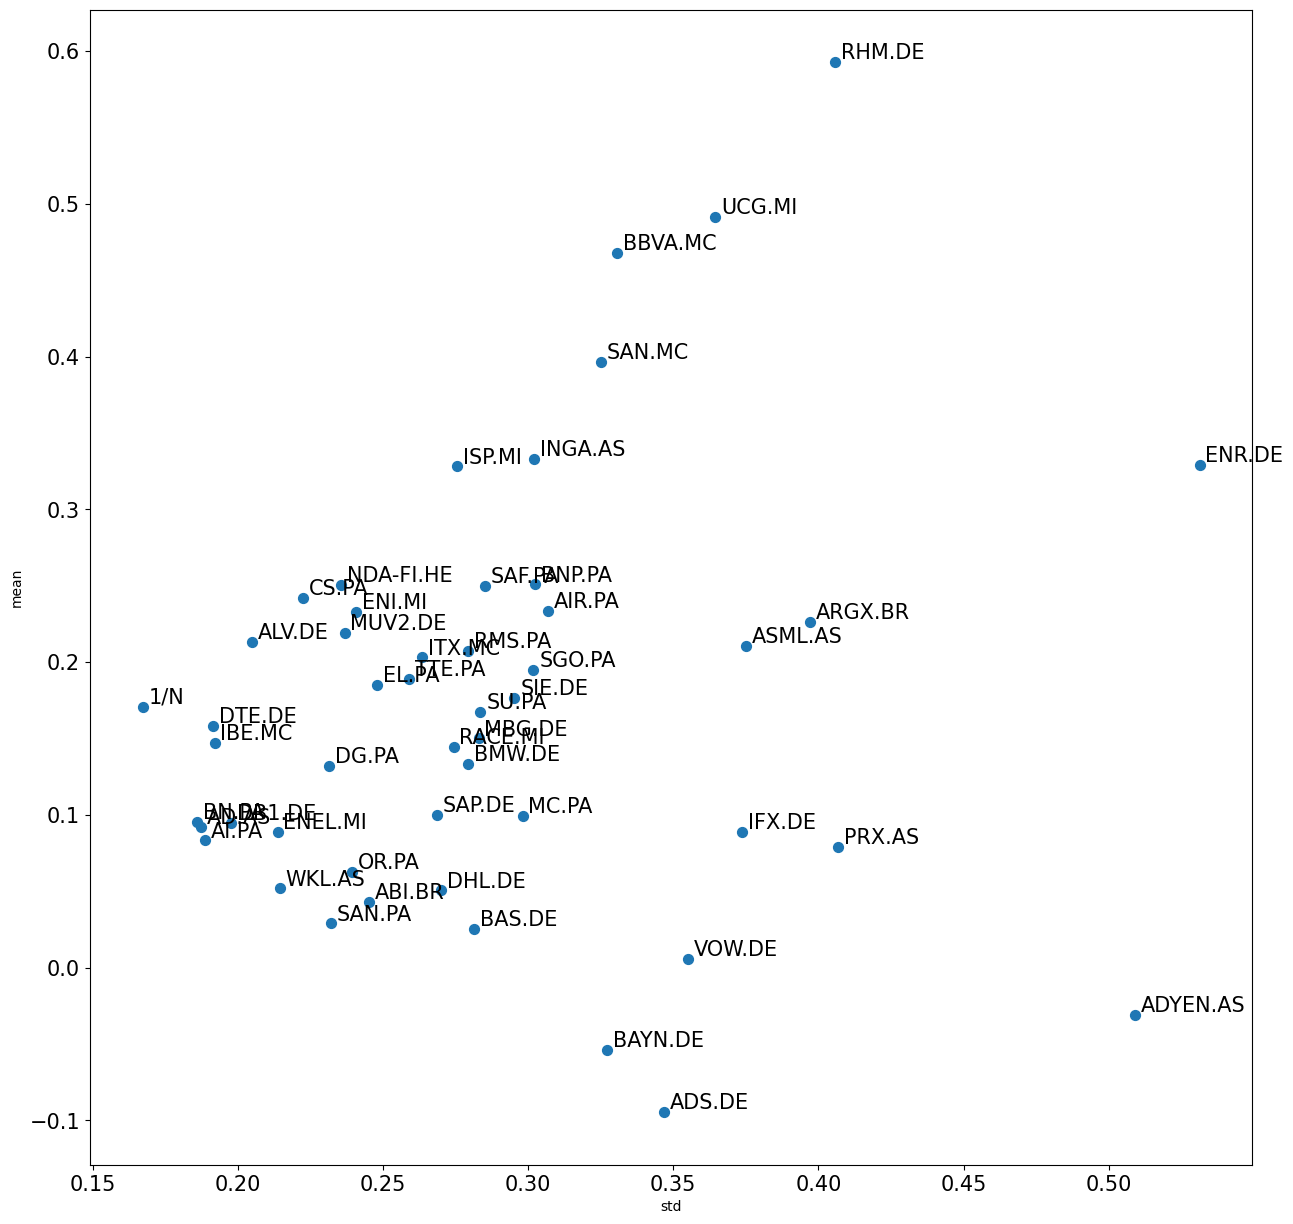

In [68]:
InvOpp.plot(kind = 'scatter', x= 'std', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'std']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)
plt.show()

In [69]:
InvOpp.describe()

mean        std
count  50.000000  50.000000
mean    0.170794   0.284641
std     0.134697   0.078010
min    -0.094668   0.167229
25%     0.088870   0.233044
50%     0.162815   0.277416
75%     0.231123   0.320532
max     0.592783   0.531317

In [70]:
#gLS Regressoin
import statsmodels.api as sm

X = InvOpp['std']
X = sm.add_constant(X)

y = InvOpp['mean']

GLS_mu_sigma = sm.GLS(y,X)
Fit_mu_sigma = GLS_mu_sigma.fit()

In [71]:
dir(Fit_mu_sigma)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fva

In [72]:
print(Fit_mu_sigma.summary())

                            GLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.040
Model:                            GLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.998
Date:                Wed, 24 Dec 2025   Prob (F-statistic):              0.164
Time:                        12:05:42   Log-Likelihood:                 30.814
No. Observations:                  50   AIC:                            -57.63
Df Residuals:                      48   BIC:                            -53.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0726      0.072      1.007      0.3

<function matplotlib.pyplot.show(close=None, block=None)>

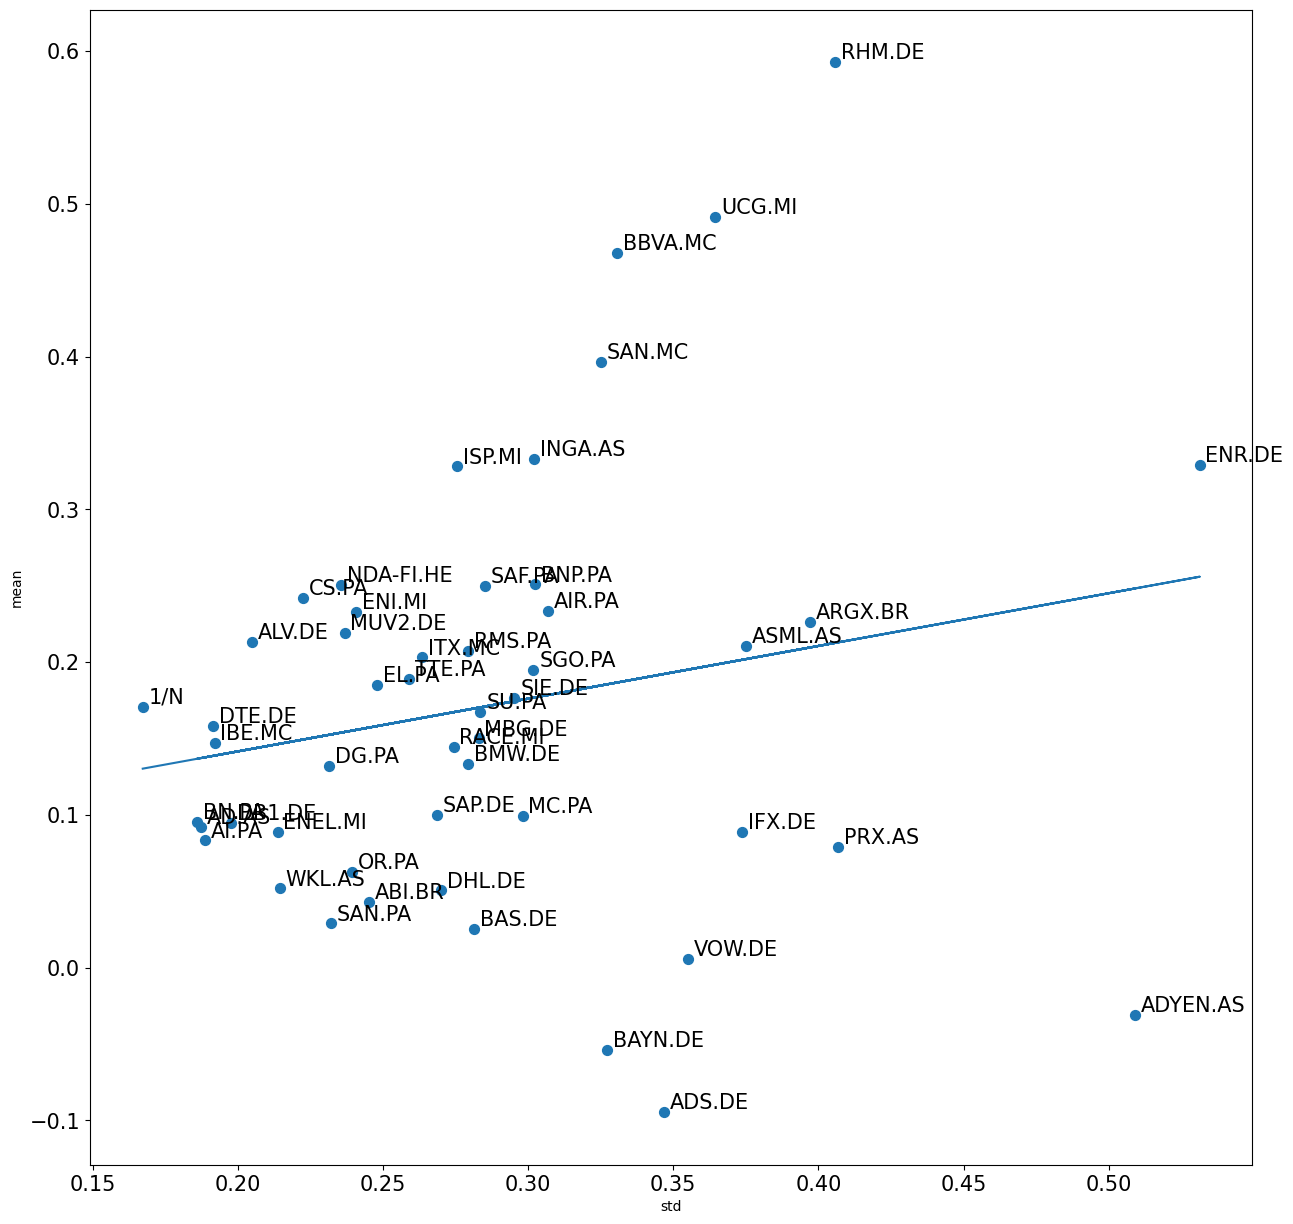

In [73]:
InvOpp.plot(kind = 'scatter', x= 'std', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'std']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)
#GLS
plt.plot(InvOpp['std'], Fit_mu_sigma.predict())
plt.show

**Total Risk = Systemetic Risk(non diversiviable) + Idiosyncratic Risk(Diversifiable risk)**


In [81]:
InvOpp['Total.Risk'] = InvOpp['std']**2 

In [77]:
InvOpp['corr_1/N'] = r_d.corr().iloc[:, r_d.shape[1]-1]

In [79]:
InvOpp['Systematic.Risk'] = InvOpp['std'].iloc[InvOpp.shape[0]-1] * InvOpp['std'] * InvOpp['corr_1/N']

In [80]:
#beta
InvOpp['beta'] = InvOpp['Systematic.Risk'] / InvOpp['Systematic.Risk'].loc['1/N']

In [82]:
InvOpp['Idiosync.Risk'] = InvOpp['Total.Risk'] - InvOpp['Systematic.Risk']

In [83]:
InvOpp

mean       std  corr_1/N  Systematic.Risk      beta  \
ABI.BR     0.043208  0.245114  0.552365         0.022642  0.809625   
AD.AS      0.092193  0.187299  0.252016         0.007894  0.282262   
ADS.DE    -0.094668  0.346889  0.614195         0.035629  1.274049   
ADYEN.AS  -0.031159  0.508974  0.504270         0.042921  1.534789   
AI.PA      0.083257  0.188637  0.659653         0.020809  0.744099   
AIR.PA     0.233705  0.306751  0.713213         0.036586  1.308259   
ALV.DE     0.213250  0.204960  0.753483         0.025826  0.923489   
ARGX.BR    0.226493  0.396981  0.176287         0.011703  0.418485   
ASML.AS    0.210449  0.374948  0.599133         0.037567  1.343332   
BAS.DE     0.025136  0.281462  0.691886         0.032566  1.164509   
BAYN.DE   -0.053628  0.327113  0.462446         0.025297  0.904582   
BBVA.MC    0.467710  0.330538  0.692970         0.038304  1.369699   
BMW.DE     0.133314  0.279418  0.654443         0.030580  1.093491   
BN.PA      0.095336  0.185830  0.371345         0.011540  0.412651   
BNP.PA     0.250979  0.302494  0.740958         0.037482  1.340294   
CS.PA      0.242220  0.222380  0.741476         0.027574  0.986011   
DB1.DE     0.094541  0.197784  0.408417         0.013508  0.483042   
DG.PA      0.132042  0.231454  0.717434         0.027769  0.992967   
DHL.DE     0.050642  0.270152  0.678435         0.030650  1.095986   
DTE.DE     0.158343  0.191479  0.477391         0.015286  0.546619   
EL.PA      0.184996  0.247936  0.632824         0.026238  0.938235   
ENEL.MI    0.089118  0.213700  0.610948         0.021833  0.780727   
ENI.MI     0.232666  0.240799  0.542971         0.021865  0.781845   
ENR.DE     0.329031  0.531317  0.410662         0.036488  1.304750   
IBE.MC     0.147162  0.191993  0.406722         0.013058  0.466951   
IFX.DE     0.088788  0.373688  0.647695         0.040475  1.447335   
INGA.AS    0.333056  0.302180  0.712827         0.036021  1.288069   
ISP.MI     0.328110  0.275522  0.787501         0.036284  1.297470   
ITX.MC     0.203184  0.263569  0.618771         0.027273  0.975242   
MBG.DE     0.150069  0.282920  0.689295         0.032612  1.166160   
MC.PA      0.099545  0.298089  0.675559         0.033676  1.204200   
MUV2.DE    0.219167  0.236761  0.609313         0.024125  0.862661   
NDA-FI.HE  0.250677  0.235666  0.699945         0.027585  0.986391   
OR.PA      0.062857  0.239313  0.595859         0.023846  0.852707   
PRX.AS     0.079110  0.406816  0.459478         0.031259  1.117767   
RACE.MI    0.144498  0.274300  0.552876         0.025361  0.906865   
RHM.DE     0.592783  0.405761  0.281527         0.019103  0.683091   
RMS.PA     0.207408  0.279310  0.616169         0.028780  1.029144   
SAF.PA     0.250170  0.285062  0.715640         0.034115  1.219896   
SAN.MC     0.396443  0.325126  0.728860         0.039628  1.417050   
SAN.PA     0.029020  0.232170  0.315770         0.012260  0.438396   
SAP.DE     0.100039  0.268437  0.570724         0.025620  0.916130   
SGO.PA     0.195082  0.301826  0.740533         0.037378  1.336564   
SIE.DE     0.176777  0.295290  0.770487         0.038047  1.360514   
SU.PA      0.167288  0.283529  0.720075         0.034142  1.220857   
TTE.PA     0.189245  0.258959  0.521264         0.022574  0.807195   
UCG.MI     0.491403  0.364480  0.673703         0.041063  1.468355   
VOW.DE     0.005972  0.355207  0.618960         0.036767  1.314721   
WKL.AS     0.051893  0.214420  0.298295         0.010696  0.382472   
1/N        0.170794  0.167229  1.000000         0.027965  1.000000   

           Total.Risk  Idiosync.Risk  
ABI.BR       0.060081       0.037440  
AD.AS        0.035081       0.027187  
ADS.DE       0.120332       0.084703  
ADYEN.AS     0.259055       0.216134  
AI.PA        0.035584       0.014775  
AIR.PA       0.094096       0.057510  
ALV.DE       0.042009       0.016183  
ARGX.BR      0.157594       0.145891  
ASML.AS      0.140586       0.103019  
BAS.DE       0.079221       0.046655  
BAYN.DE      0.

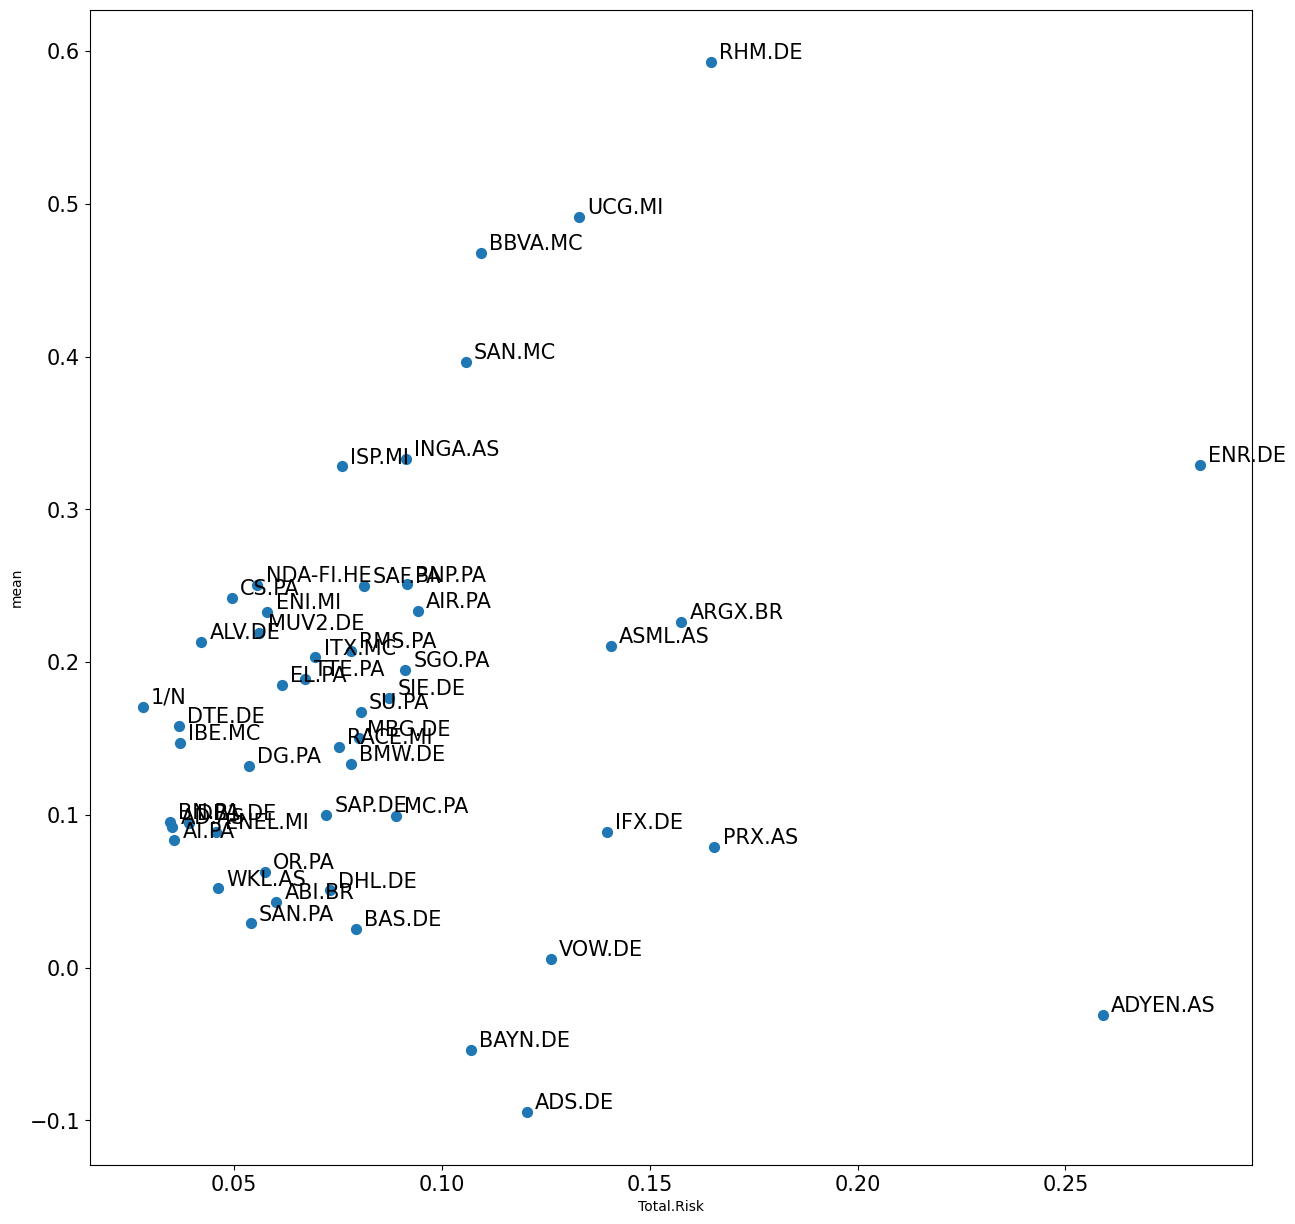

In [86]:
InvOpp.plot(kind = 'scatter', x= 'Total.Risk', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'Total.Risk']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)

plt.show()

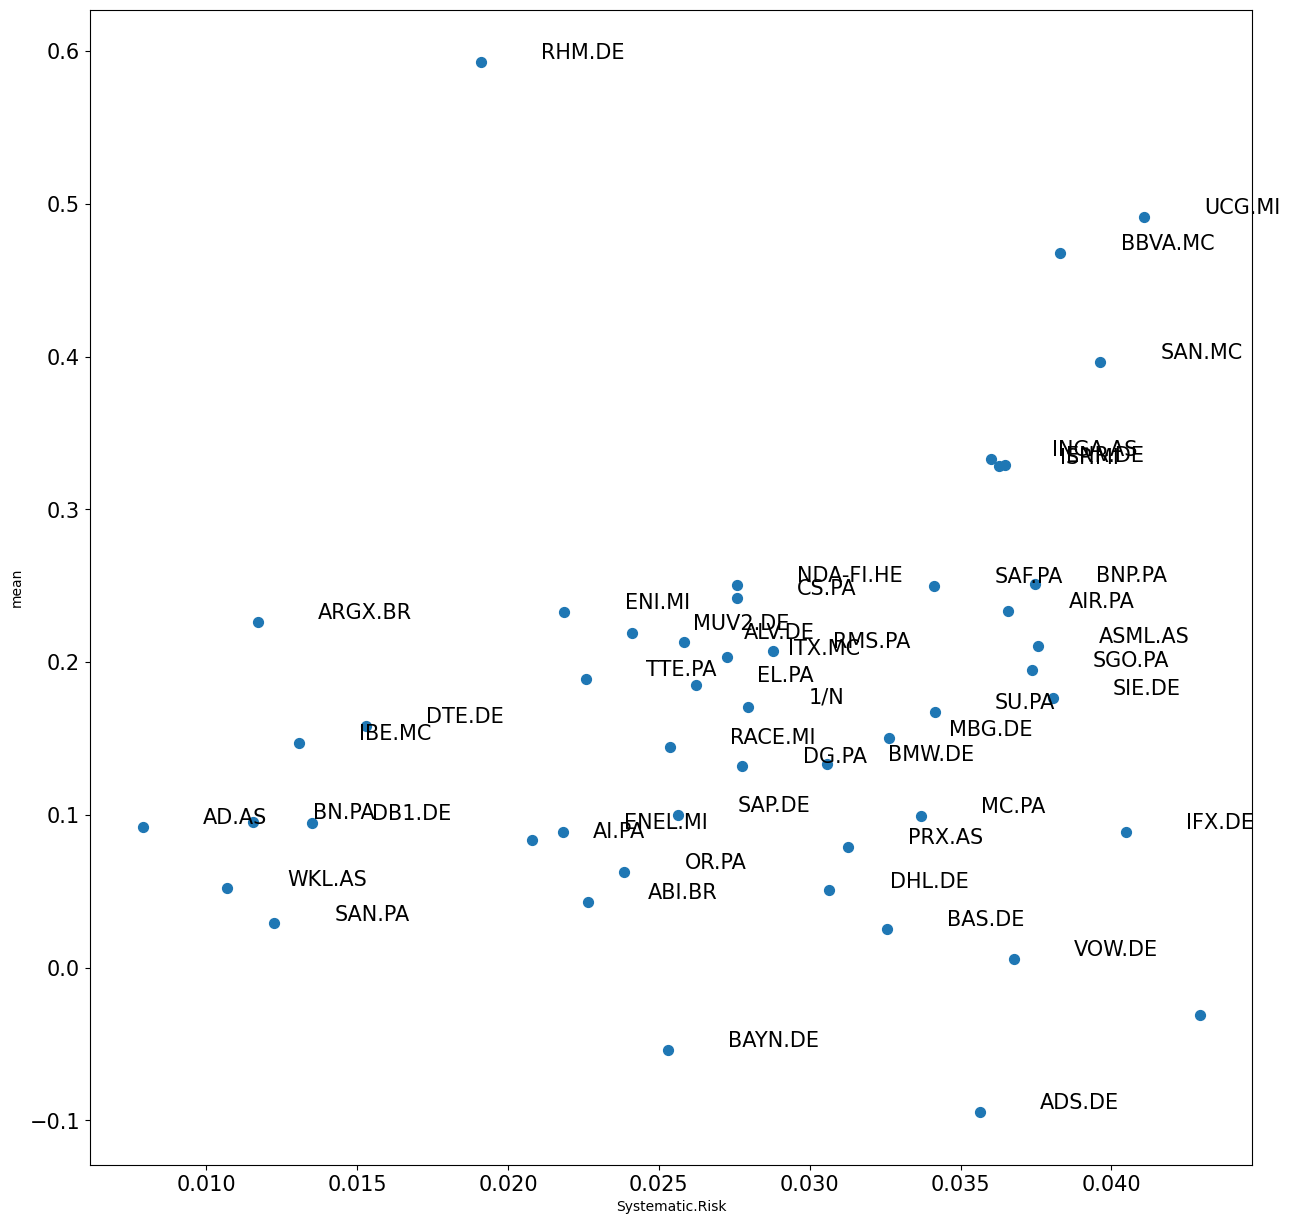

In [87]:
InvOpp.plot(kind = 'scatter', x= 'Systematic.Risk', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'Systematic.Risk']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)

plt.show()

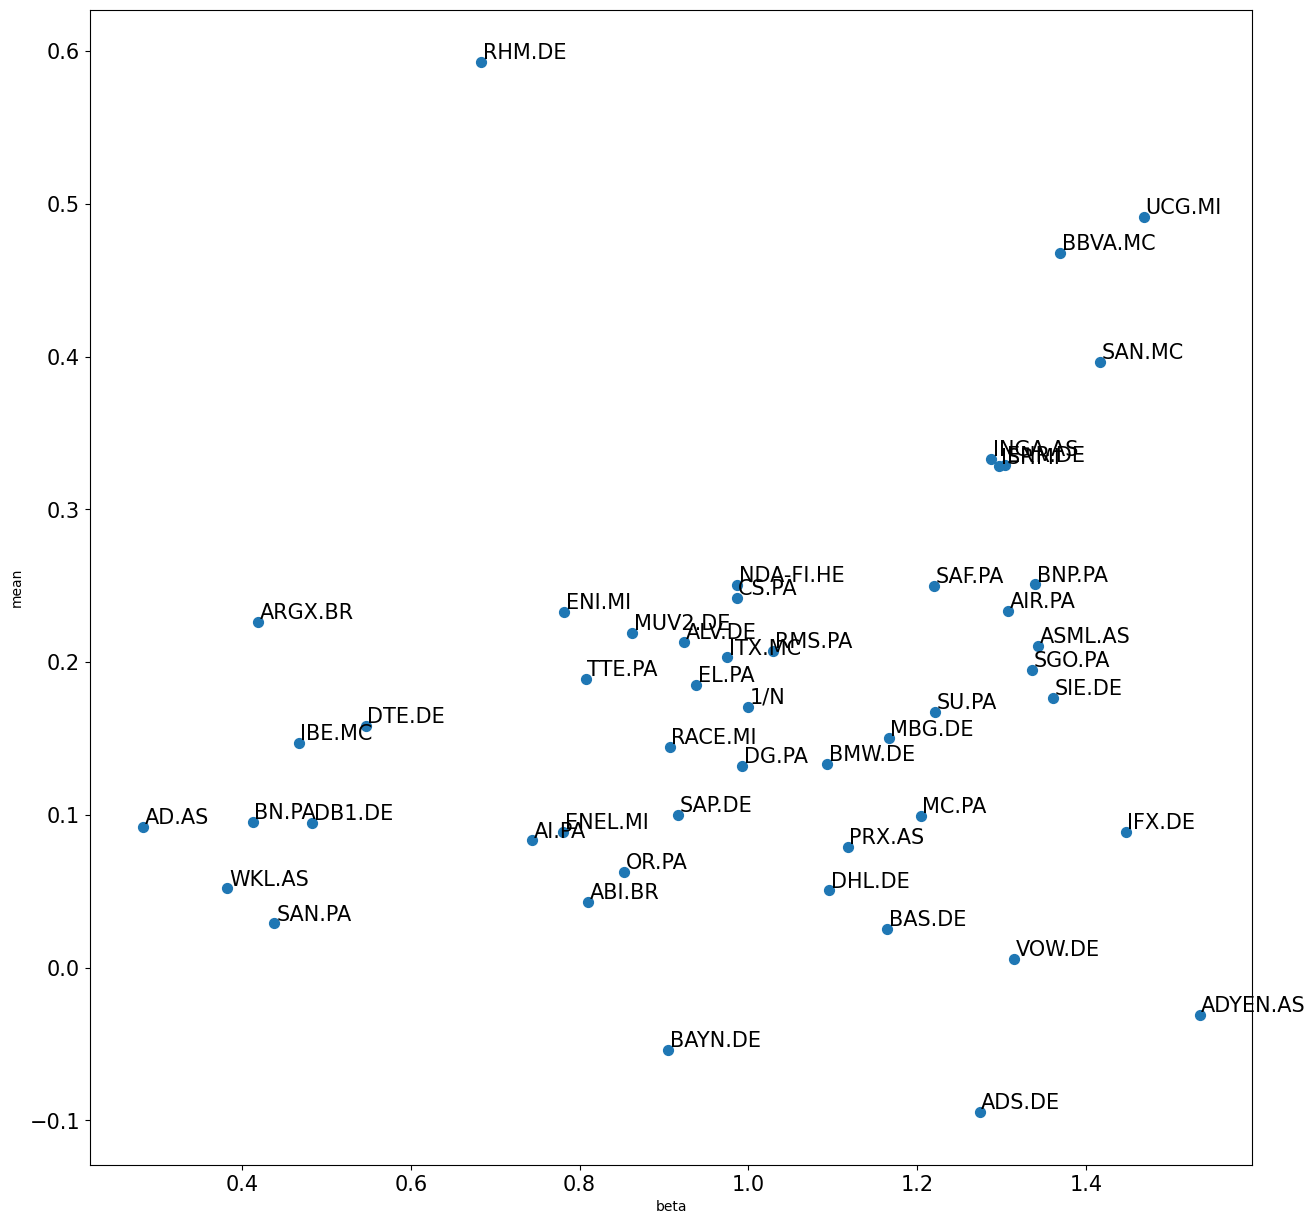

In [90]:
InvOpp.plot(kind = 'scatter', x= 'beta', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'beta']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)

plt.show()

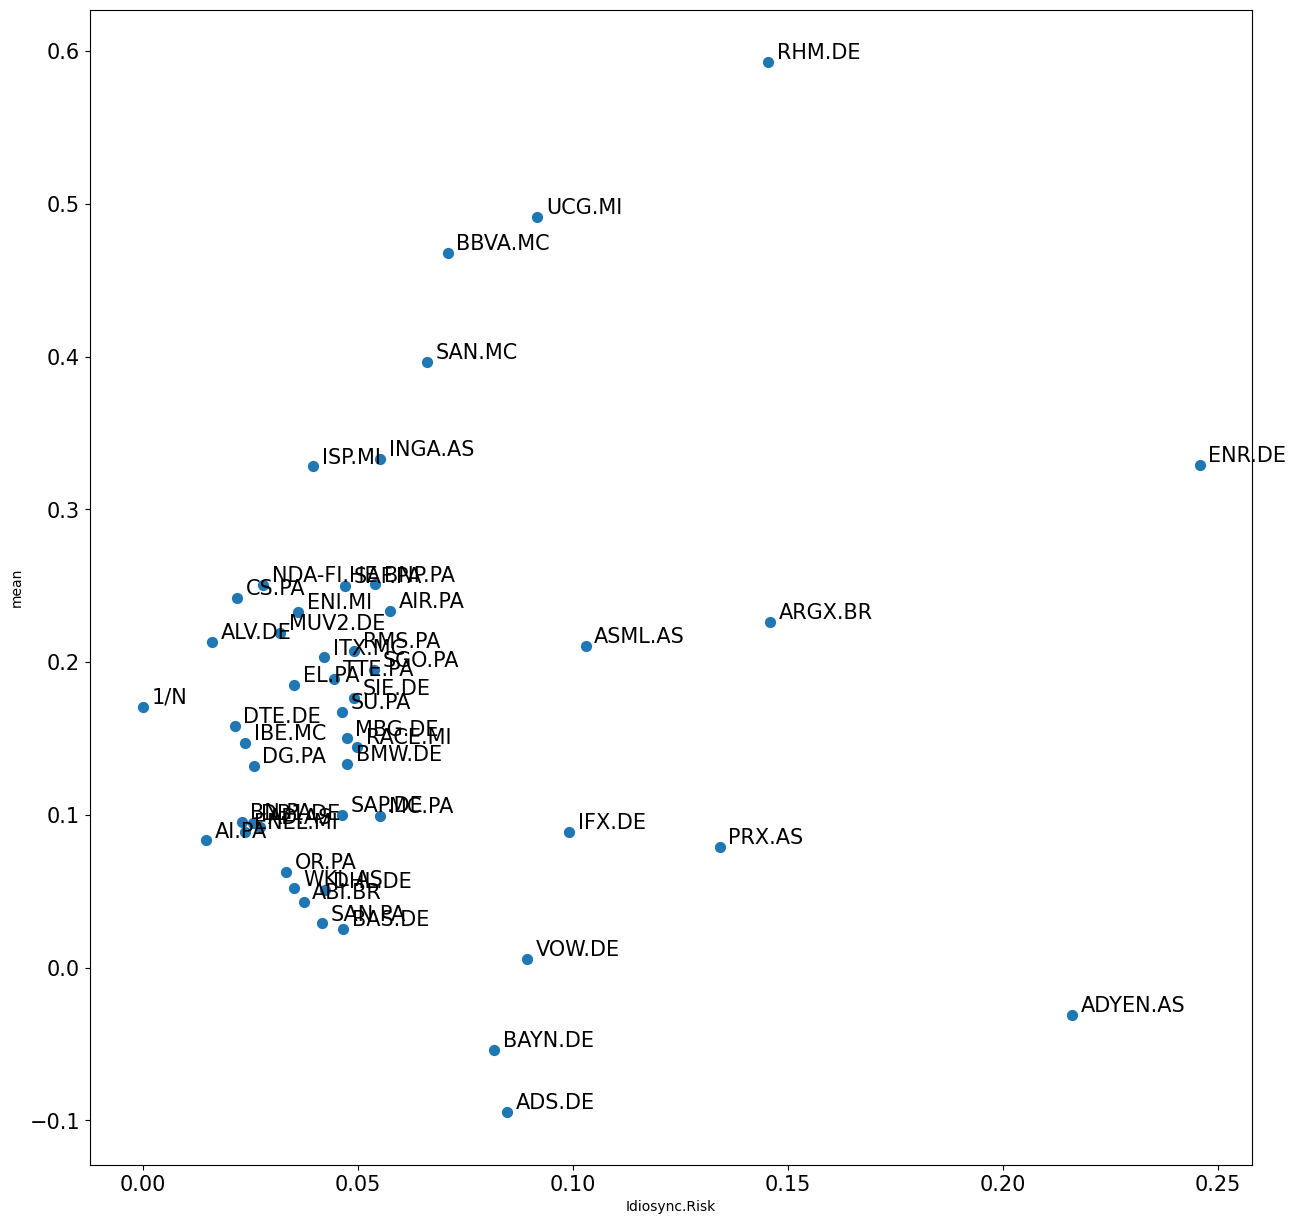

In [91]:
InvOpp.plot(kind = 'scatter', x= 'Idiosync.Risk', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'Idiosync.Risk']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)

plt.show()

In [93]:
#CAPM fails in EU 50
X = InvOpp['beta']
X = sm.add_constant(X)

y = InvOpp['mean']
GLS_mu_beta = sm.GLS(y,X)
Fit_mu_beta = GLS_mu_beta.fit()
print(Fit_mu_beta.summary())
#95% unexplained :(

                            GLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.047
Model:                            GLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.377
Date:                Wed, 24 Dec 2025   Prob (F-statistic):              0.130
Time:                        12:35:42   Log-Likelihood:                 31.003
No. Observations:                  50   AIC:                            -58.01
Df Residuals:                      48   BIC:                            -54.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0820      0.061      1.352      0.1

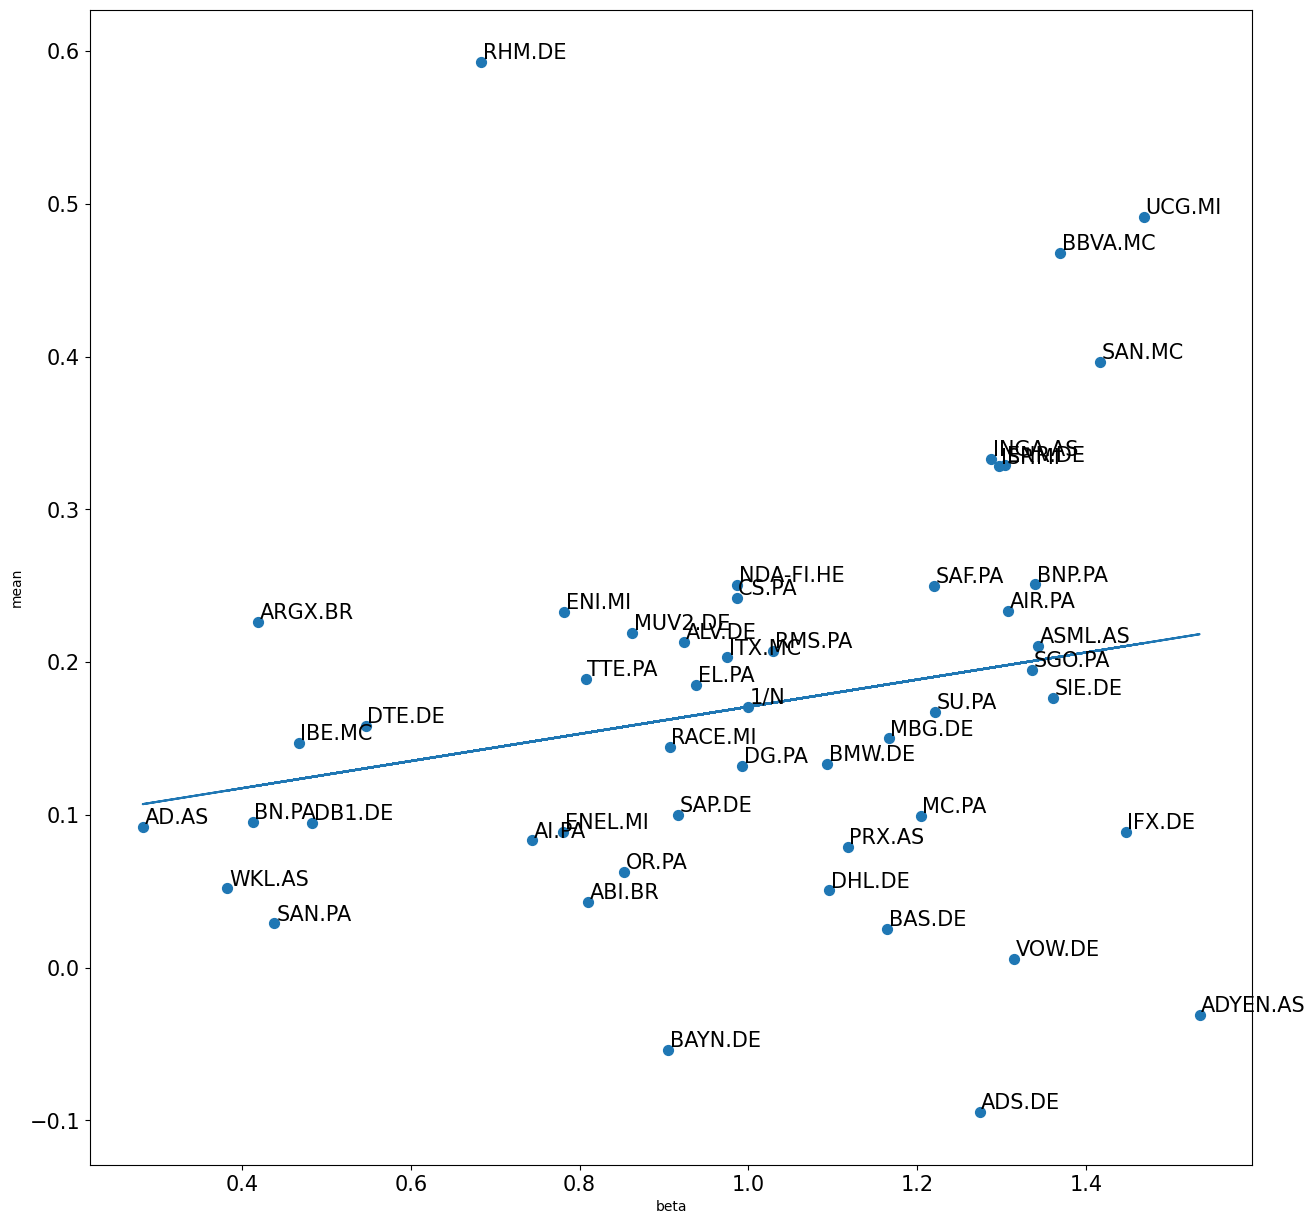

In [97]:
InvOpp.plot(kind = 'scatter', x= 'beta', y = 'mean', figsize = (15,15), s=50, fontsize = 15)
for i in InvOpp.index:
    plt.annotate(i, xy=(InvOpp.loc[i, 'beta']+0.002, InvOpp.loc[i, 'mean']+0.002), size = 15)

plt.plot(InvOpp['beta'], Fit_mu_beta.predict())
plt.show()

**Skewness and Kurtosis(realized, cross sectional)**

(array([ 1.,  0.,  0.,  1.,  2.,  1.,  2., 11., 24.,  8.]),
 array([-4.1962801 , -3.69807829, -3.19987648, -2.70167468, -2.20347287,
        -1.70527106, -1.20706926, -0.70886745, -0.21066564,  0.28753616,
         0.78573797]),
 <BarContainer object of 10 artists>)

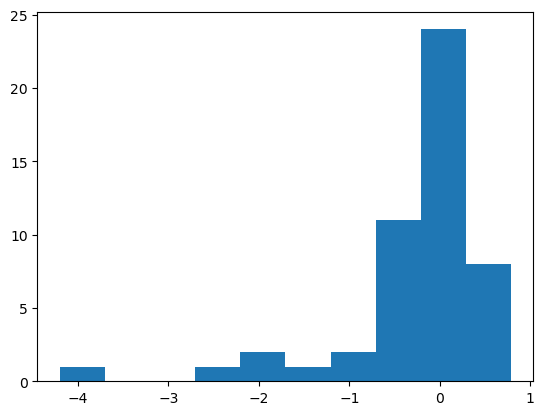

In [98]:
from scipy import stats

plt.hist(stats.skew(r_d))

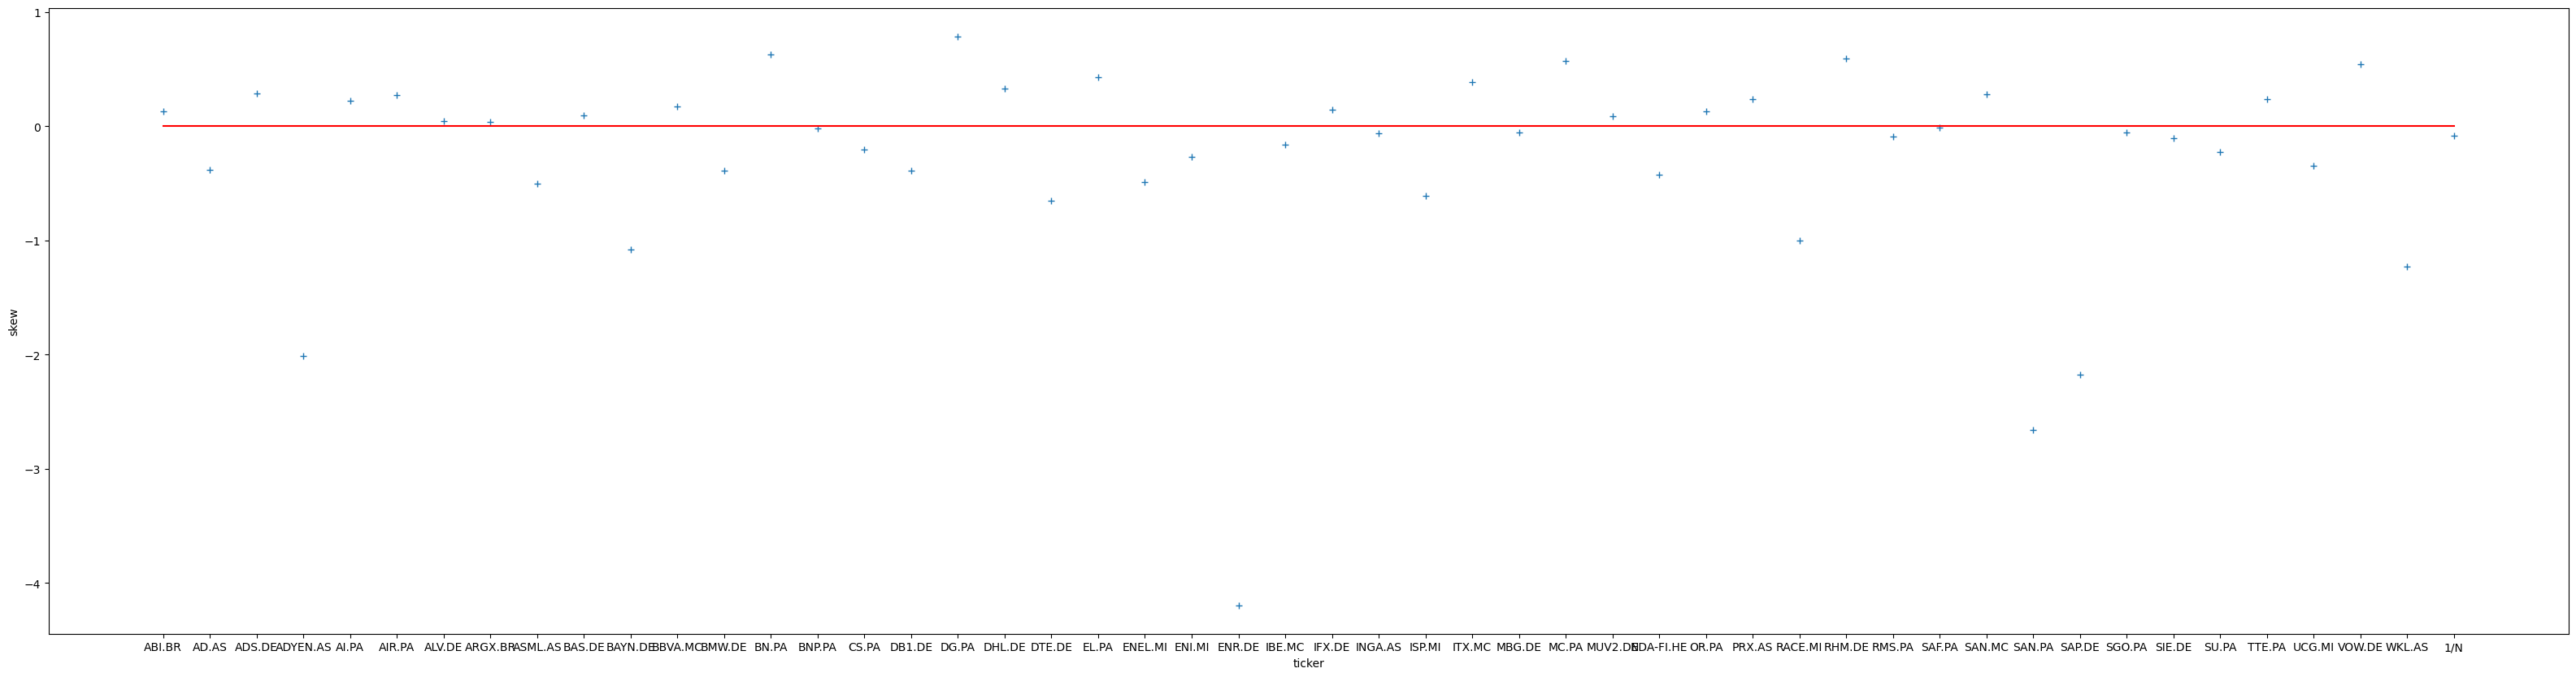

In [101]:
plt.figure(figsize=(40,10))
plt.plot(r_d.columns, stats.skew(r_d), '+')
plt.plot(r_d.columns, 0*np.ones((r_d.shape[1], 1)), 'r')
plt.ylabel('skew')
plt.xlabel('ticker')

plt.show()

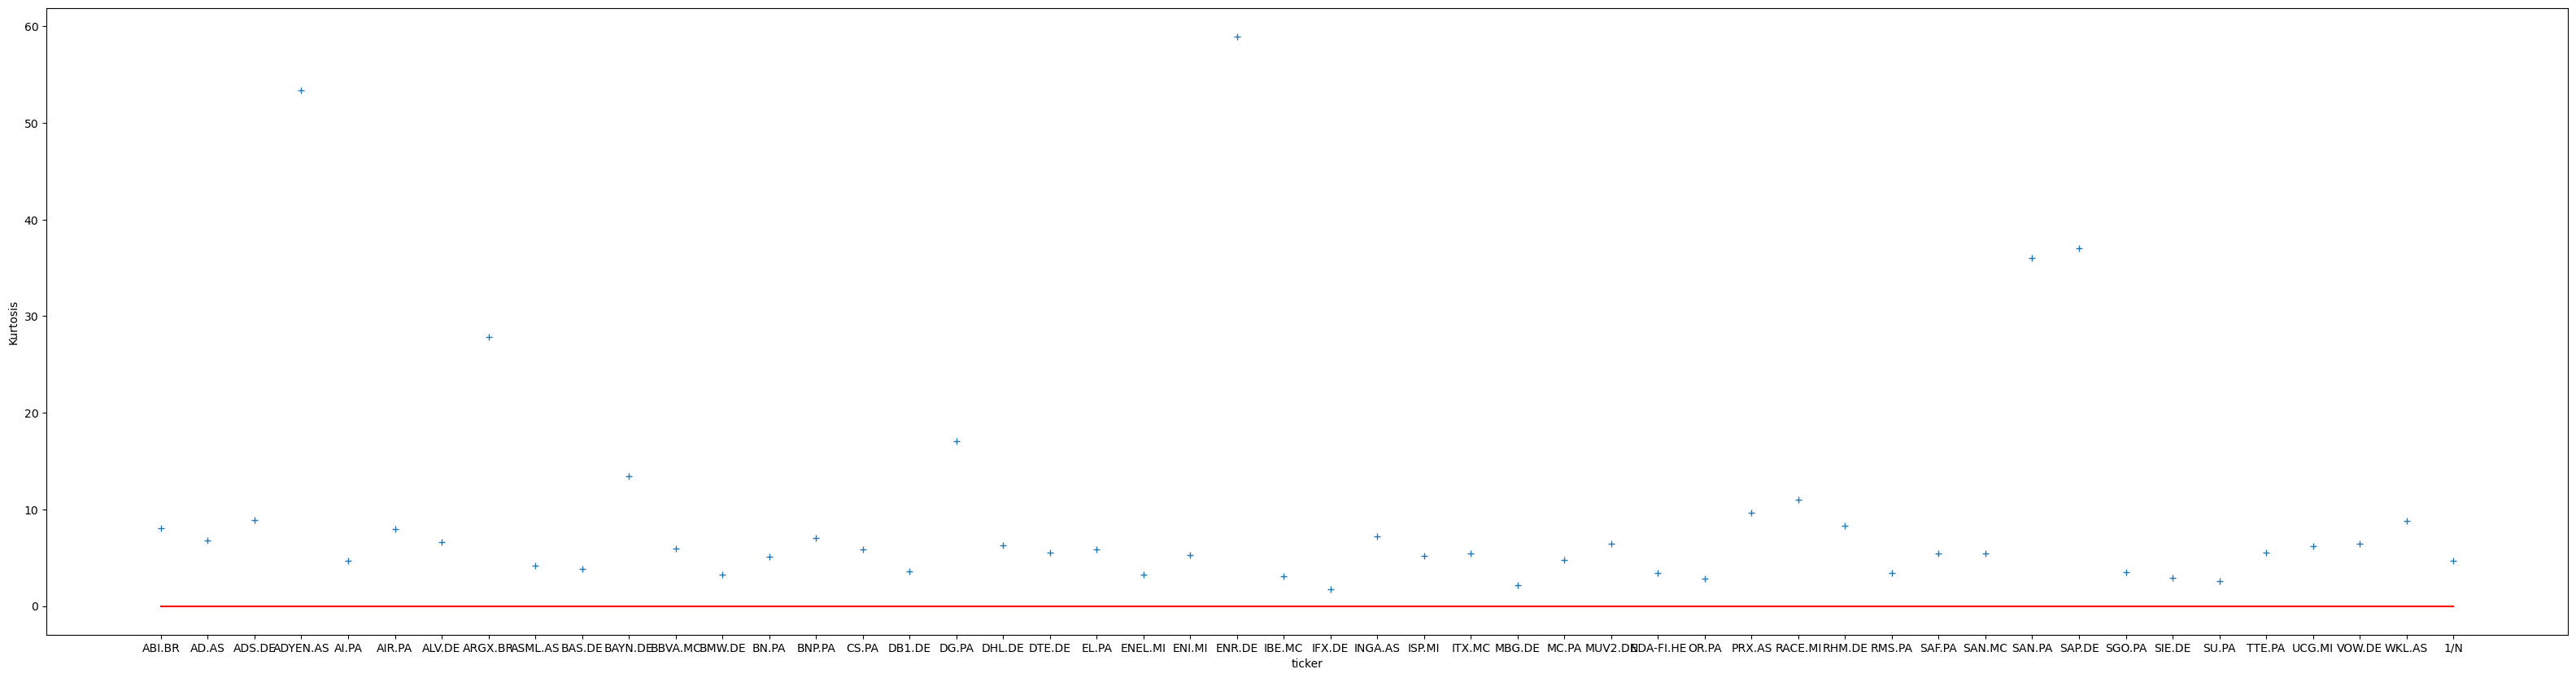

In [103]:
plt.figure(figsize=(40,10))
plt.plot(r_d.columns, stats.kurtosis(r_d), '+')
plt.plot(r_d.columns, 0*np.ones((r_d.shape[1], 1)), 'r')
plt.ylabel('Kurtosis')
plt.xlabel('ticker')

plt.show()